In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 50,
                    'ytick.labelsize' : 50,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

In [3]:
tree=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksNOBIB.root")["tracks_tree"]
treeBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksBIB.root")["tracks_tree"]

In [4]:
print(tree.keys())

['x1', 'y1', 'z1', 't1', 'theta1', 'phi1', 'system1', 'layer1', 'side1', 'x2', 'y2', 'z2', 't2', 'theta2', 'phi2', 'system2', 'layer2', 'side2', 'x3', 'y3', 'z3', 't3', 'theta3', 'phi3', 'system3', 'layer3', 'side3', 'x4', 'y4', 'z4', 't4', 'theta4', 'phi4', 'system4', 'layer4', 'side4']


In [5]:
firstHit=ak.zip({
    "x" : tree["x1"].array(),
    "y" : tree["y1"].array(),
    "z" : tree["z1"].array(),
    "t" : tree["t1"].array(),
    "theta" : tree["theta1"].array(),
    "phi" : tree["phi1"].array(),
    "sys" : tree["system1"].array(),
    "lay" : tree["layer1"].array(),
    "side" : tree["side1"].array(),
    "r" : np.sqrt(tree["x1"].array()**2+tree["y1"].array()**2)
})

In [6]:
secondHit=ak.zip({
    "x" : tree["x2"].array(),
    "y" : tree["y2"].array(),
    "z" : tree["z2"].array(),
    "t" : tree["t2"].array(),
    "theta" : tree["theta2"].array(),
    "phi" : tree["phi2"].array(),
    "sys" : tree["system2"].array(),
    "lay" : tree["layer2"].array(),
    "side" : tree["side2"].array(),
    "r" : np.sqrt(tree["x2"].array()**2+tree["y2"].array()**2)
})

In [7]:
firstHitBIB=ak.zip({
    "x" : treeBIB["x1"].array(library="np"),
    "y" : treeBIB["y1"].array(library="np"),
    "z" : treeBIB["z1"].array(library="np"),
    "t" : treeBIB["t1"].array(library="np"),
    "theta" : treeBIB["theta1"].array(library="np"),
    "phi" : treeBIB["phi1"].array(library="np"),
    "sys" : treeBIB["system1"].array(library="np"),
    "lay" : treeBIB["layer1"].array(library="np"),
    "side" : treeBIB["side1"].array(library="np"),
    "r" : np.sqrt(treeBIB["x1"].array(library="np")**2+treeBIB["y1"].array(library="np")**2)
})

In [8]:
secondHitBIB=ak.zip({
    "x" : treeBIB["x2"].array(library="np"),
    "y" : treeBIB["y2"].array(library="np"),
    "z" : treeBIB["z2"].array(library="np"),
    "t" : treeBIB["t2"].array(library="np"),
    "theta" : treeBIB["theta2"].array(library="np"),
    "phi" : treeBIB["phi2"].array(library="np"),
    "sys" : treeBIB["system2"].array(library="np"),
    "lay" : treeBIB["layer2"].array(library="np"),
    "side" : treeBIB["side2"].array(library="np"),
    "r" : np.sqrt(treeBIB["x2"].array(library="np")**2+treeBIB["y2"].array(library="np")**2)
})

In [9]:
print(len(firstHit.x))

924


In [10]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [11]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [12]:
print(min(np.sqrt(secondHitBIB.r**2+secondHitBIB.z**2)-np.sqrt(firstHitBIB.r**2+firstHitBIB.z**2)))

0.8492056012663554


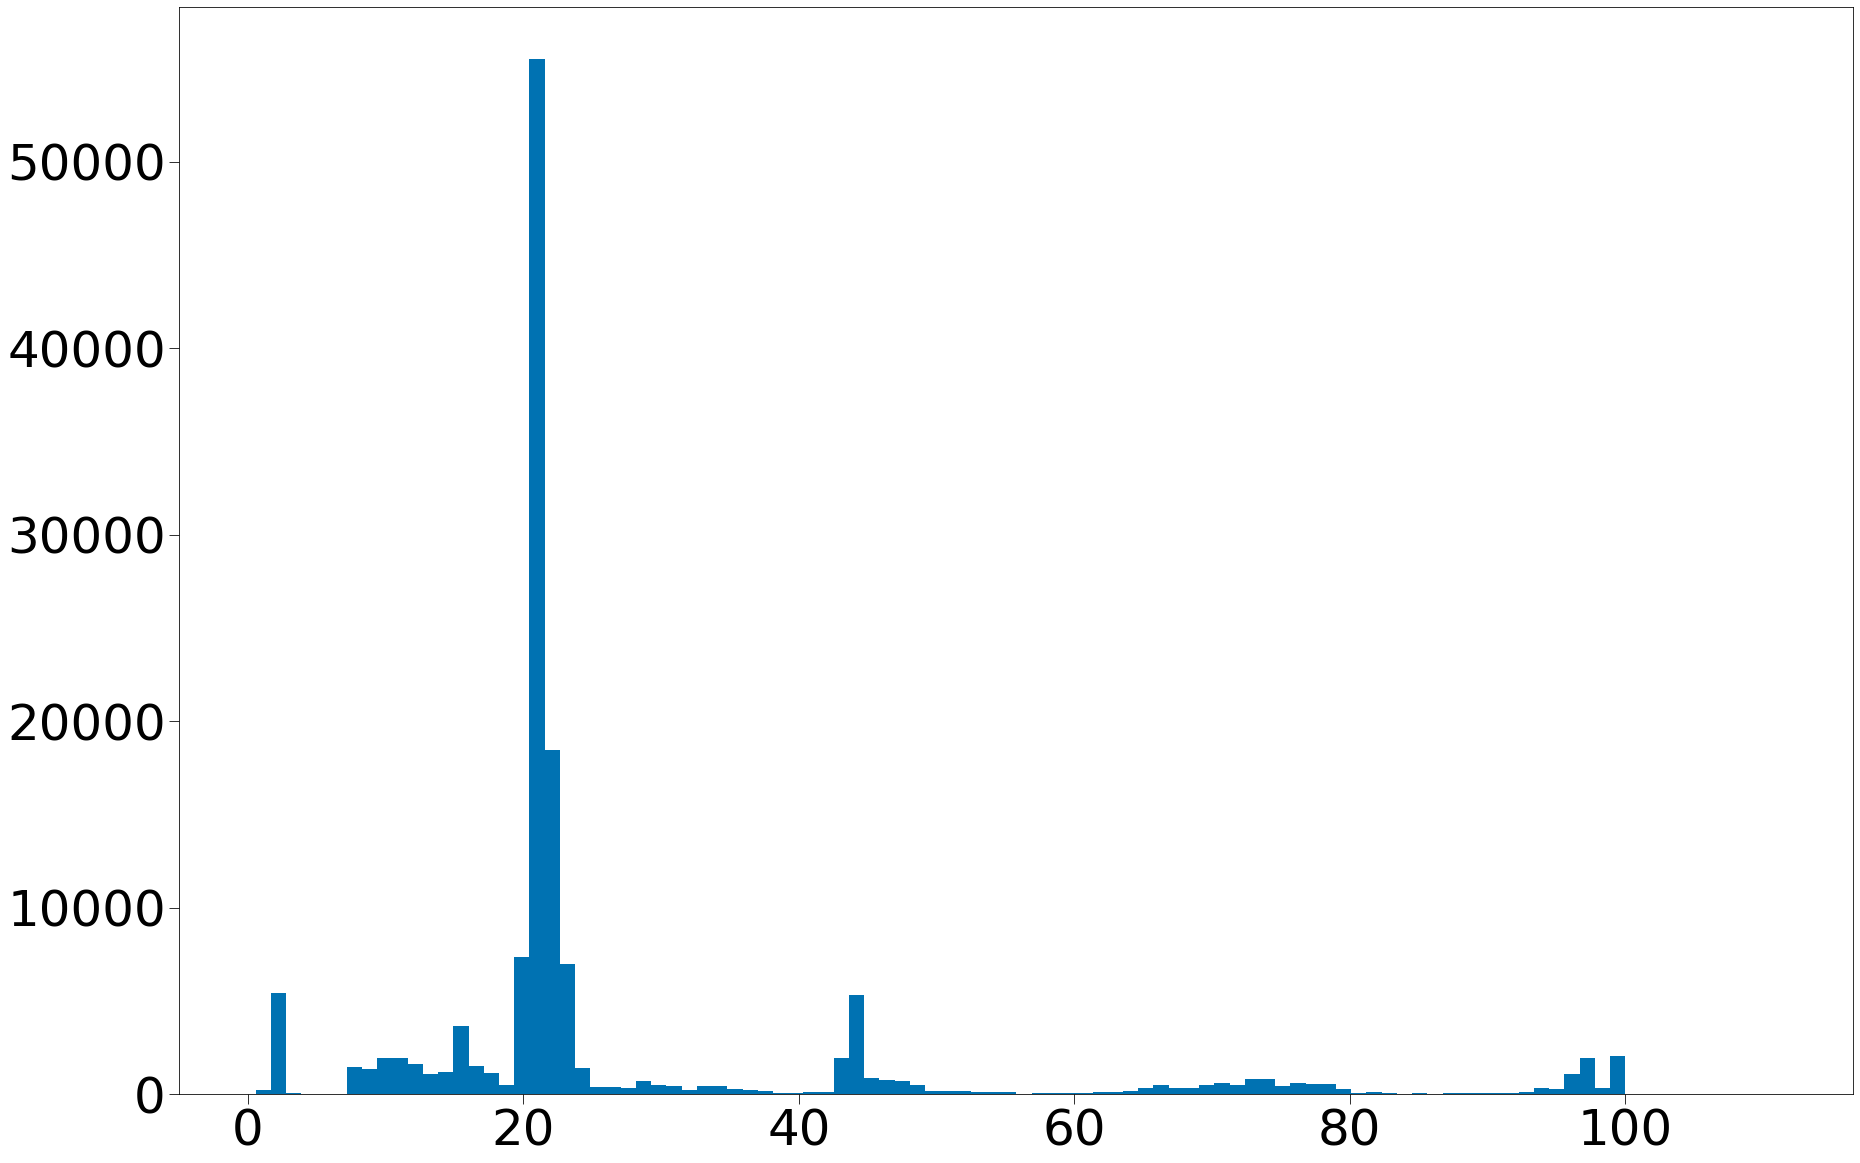

In [13]:
plot1DHistogram(secondHitBIB.r-firstHitBIB.r,bins=100)

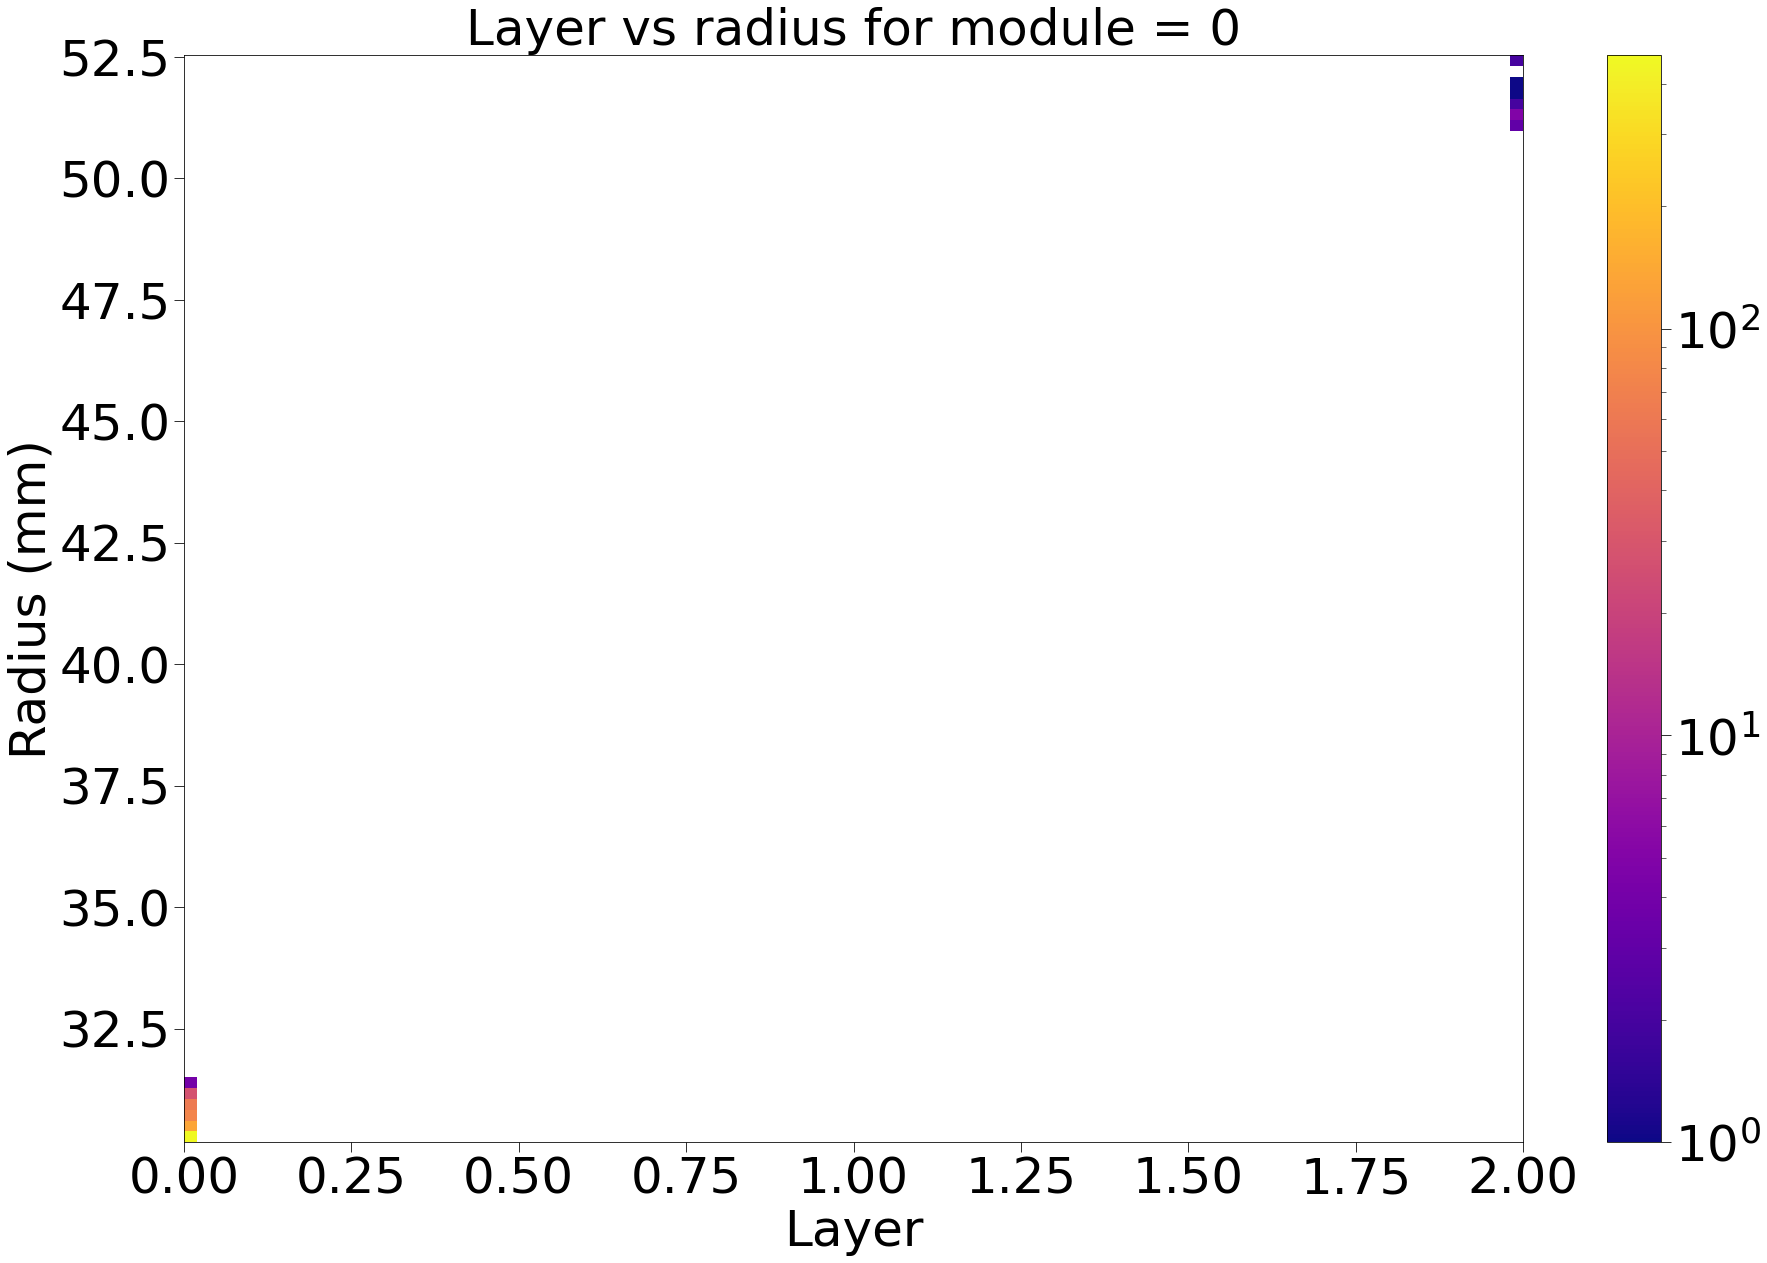

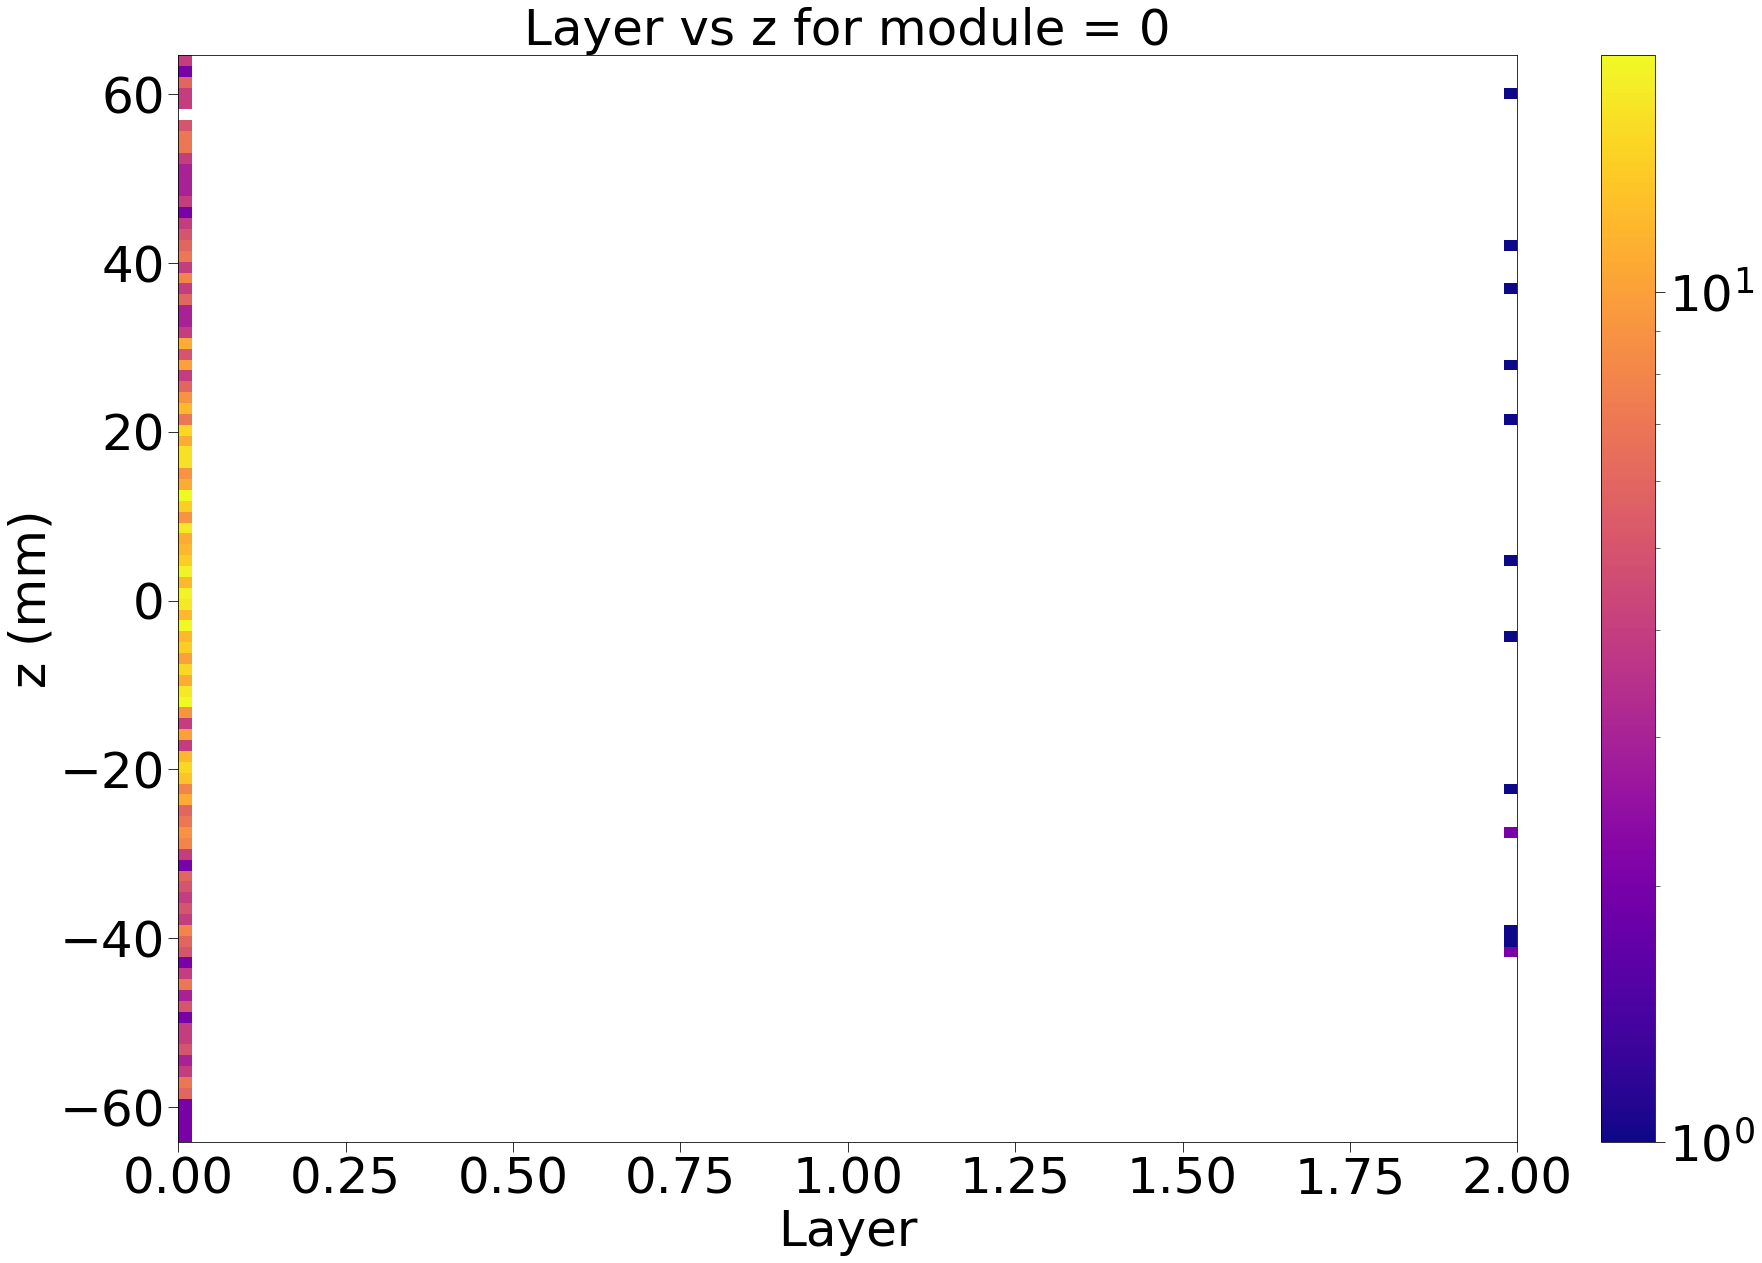

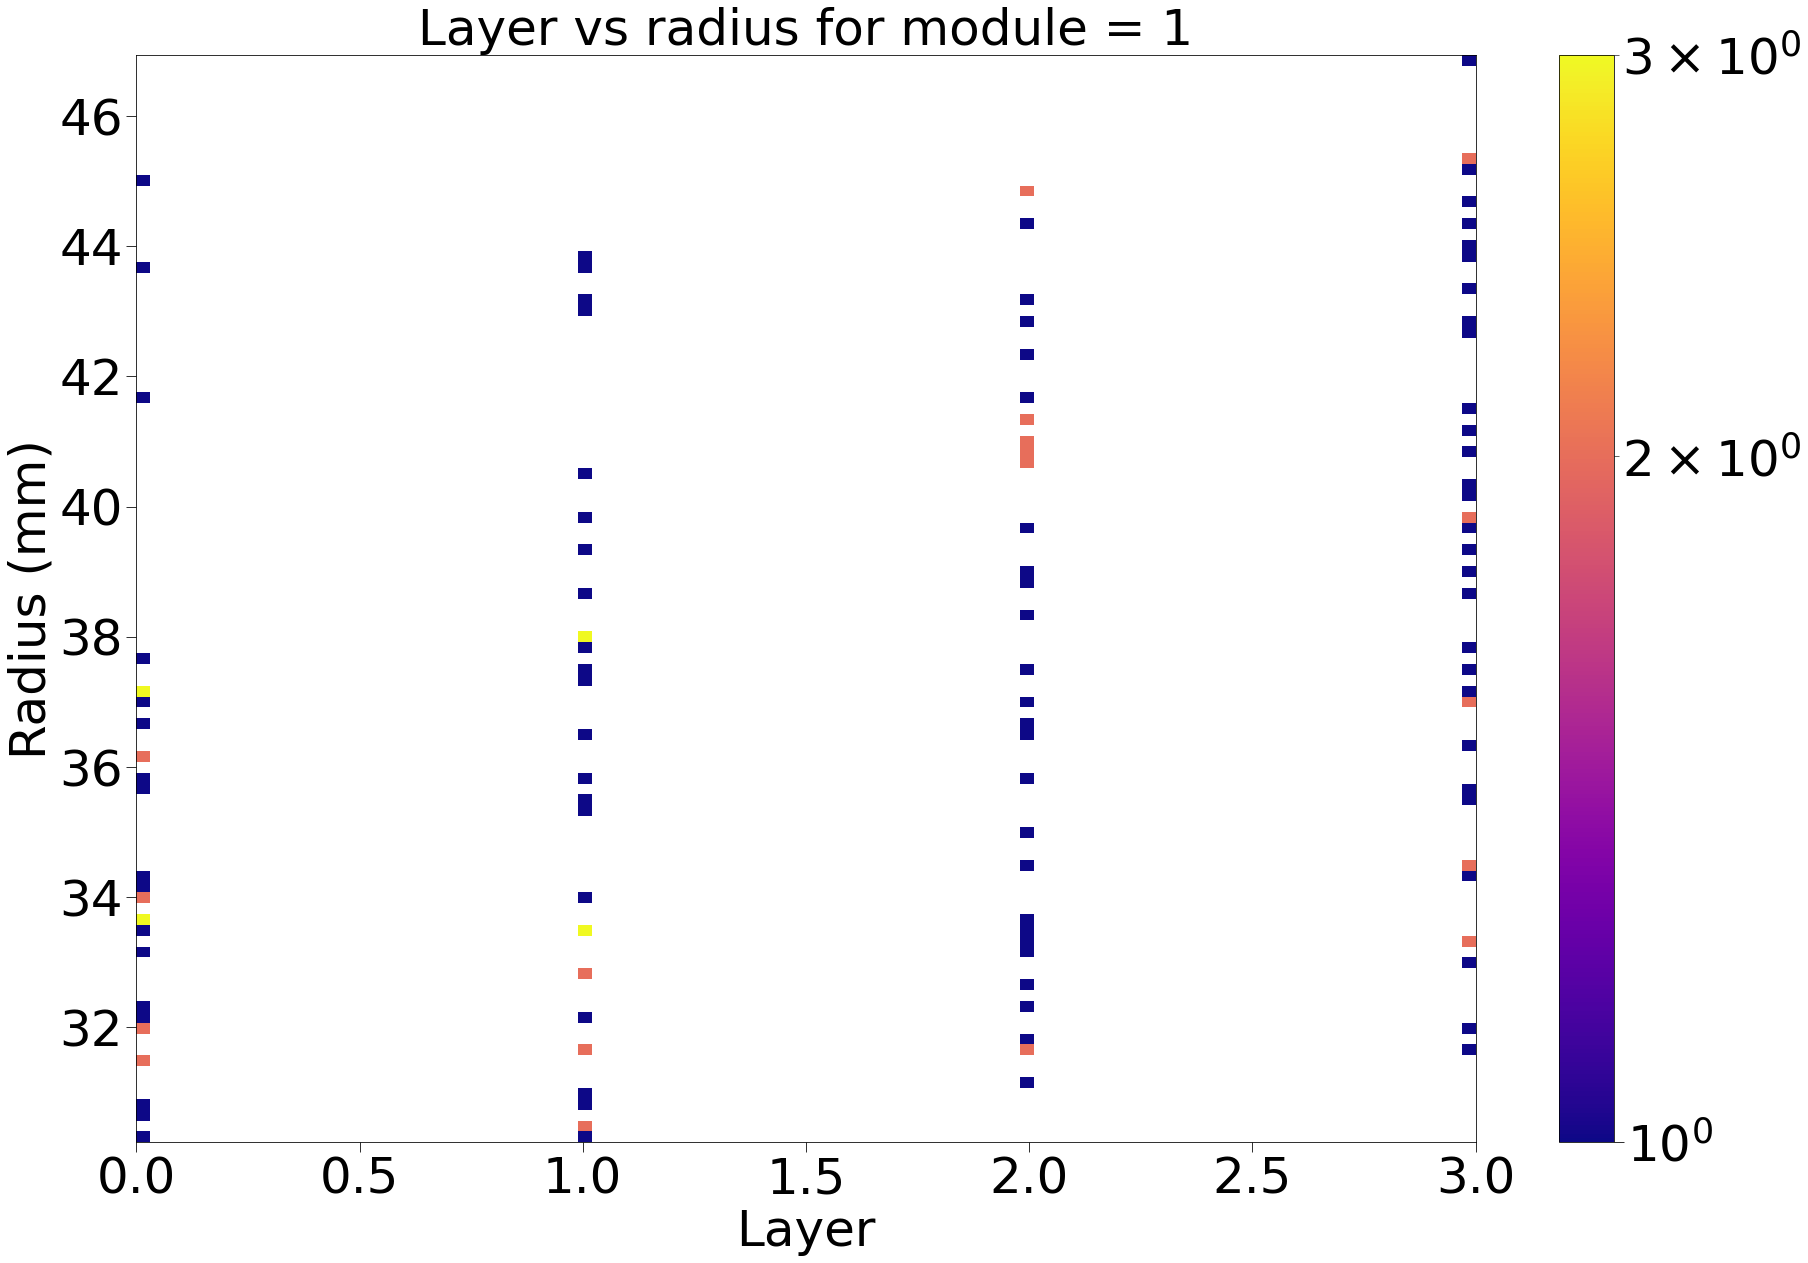

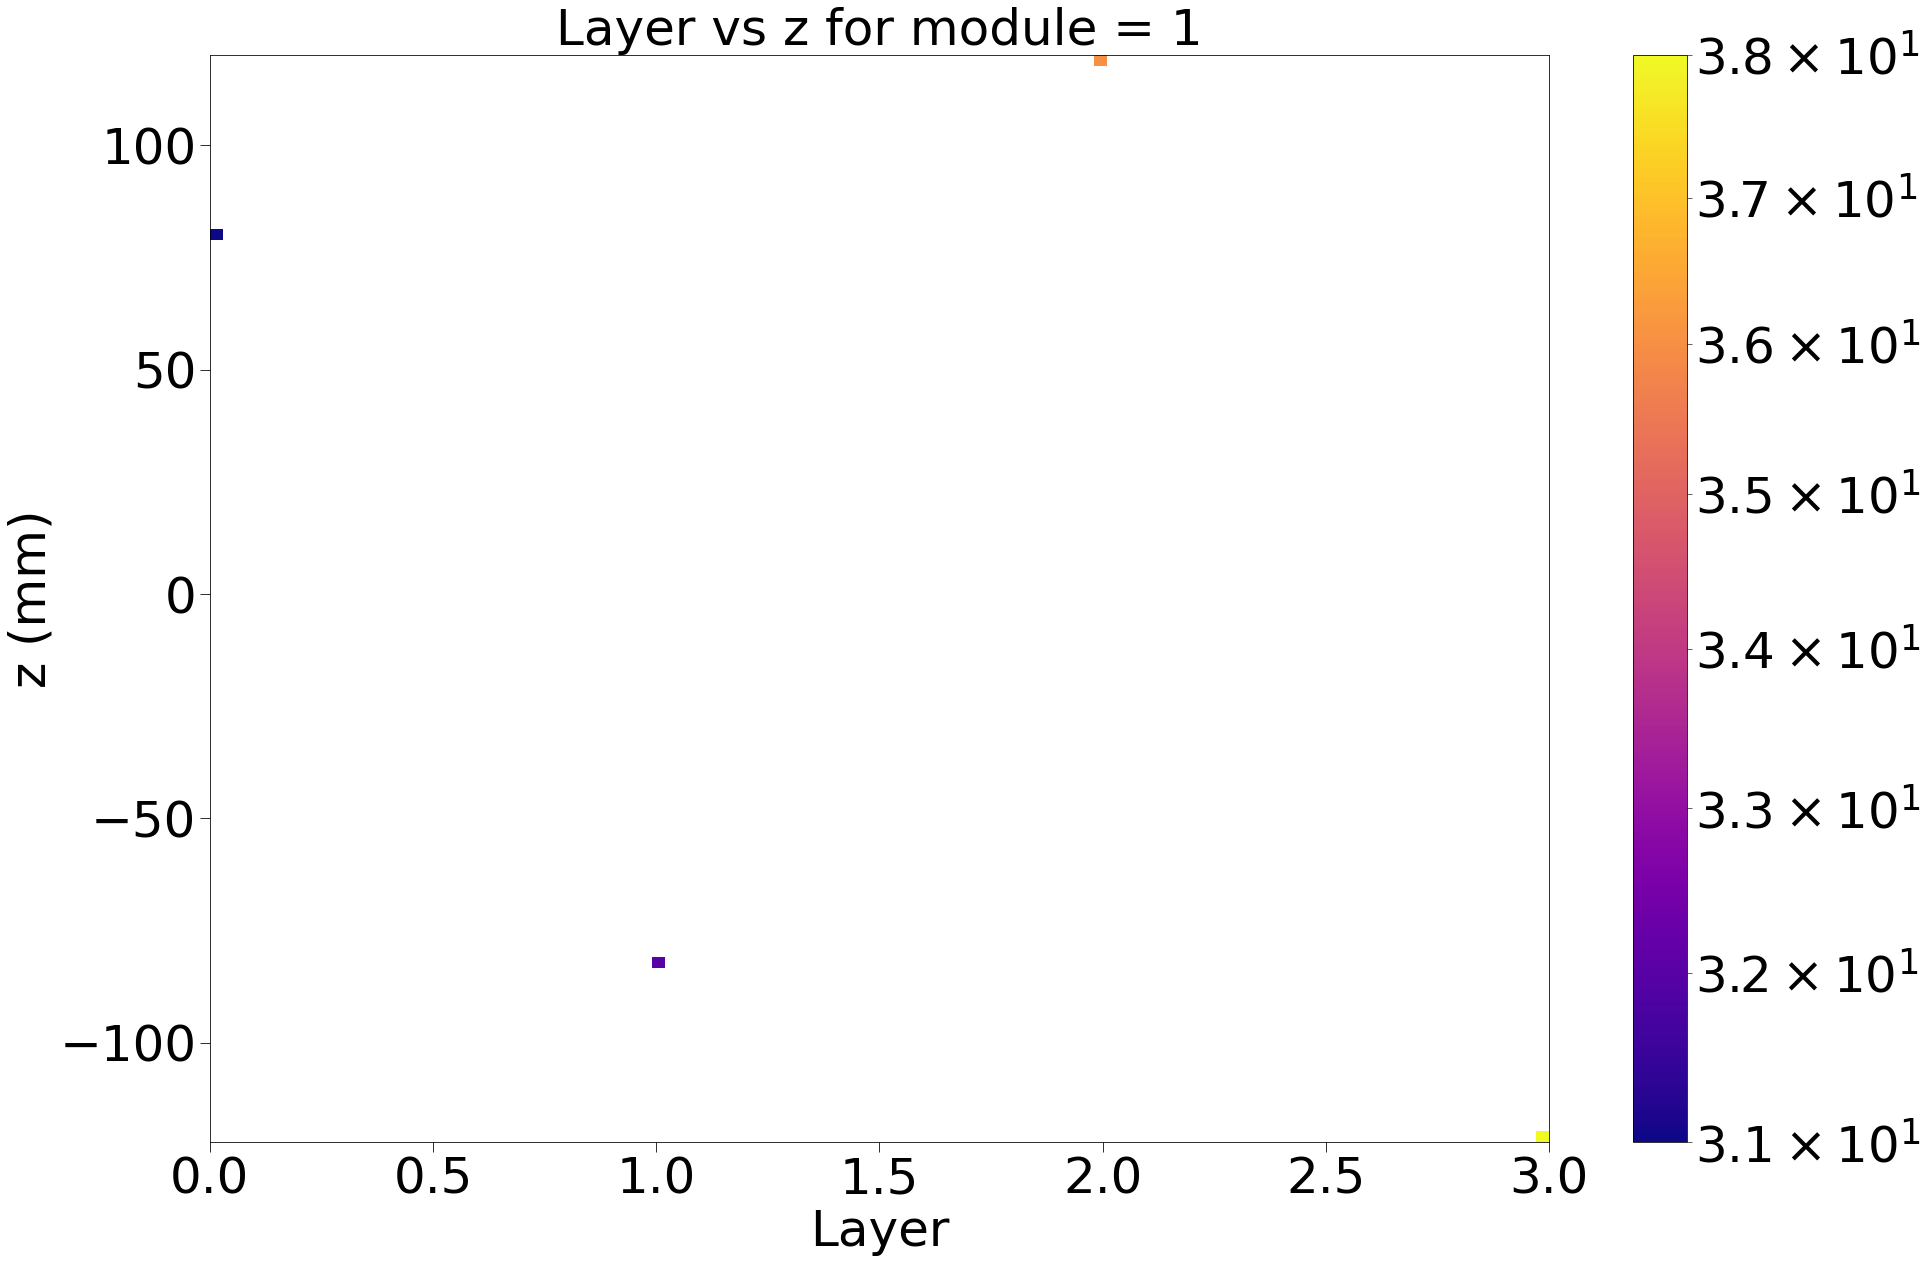

In [14]:
for i in range(int(max(firstHit.sys))):
    inMod=(firstHit.sys==(i+1))
    plot2DHistogram(firstHit.lay[inMod], firstHit.r[inMod], bins=100, label=("Layer vs radius for module = "+str(i)+";Layer;Radius (mm)"))
    plot2DHistogram(firstHit.lay[inMod], firstHit.z[inMod], bins=100, label=("Layer vs z for module = "+str(i)+";Layer;z (mm)"))

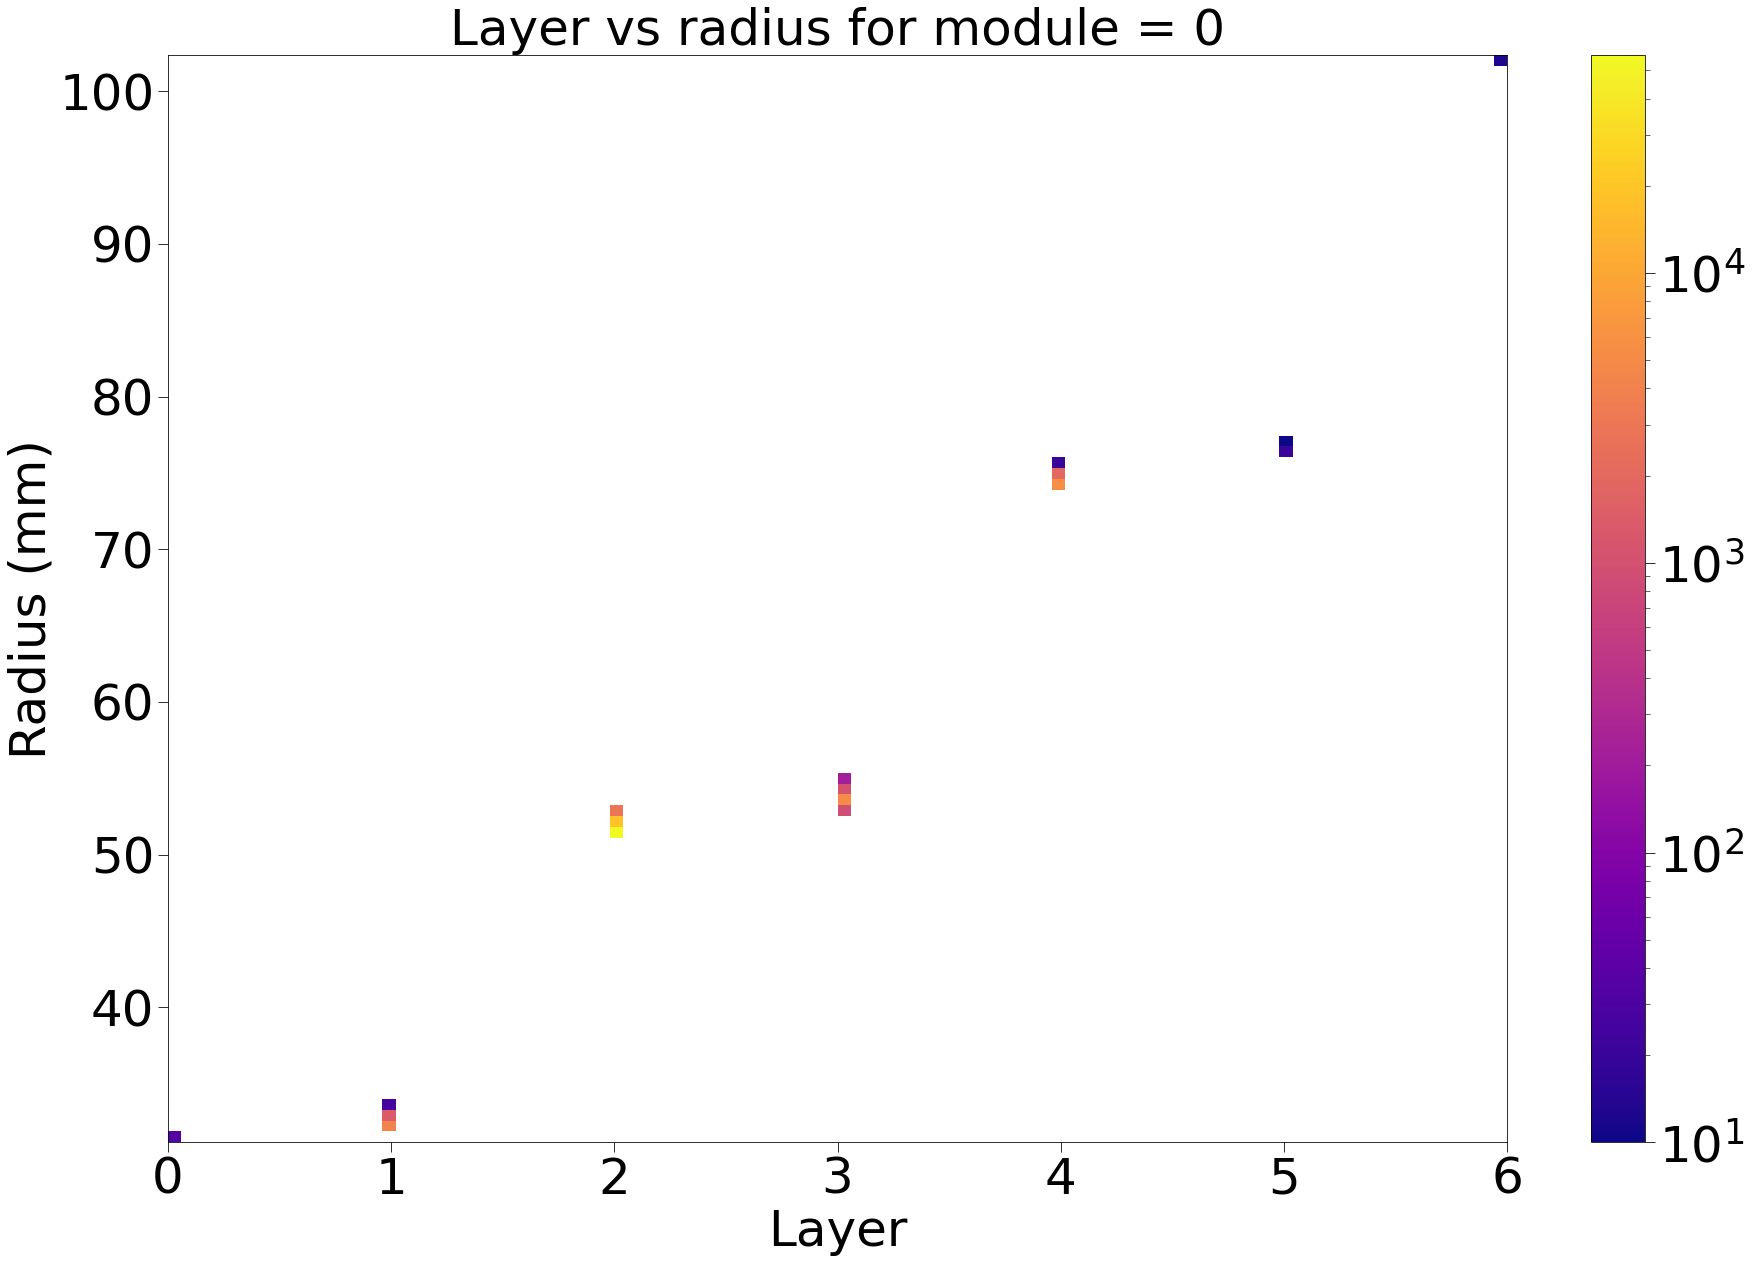

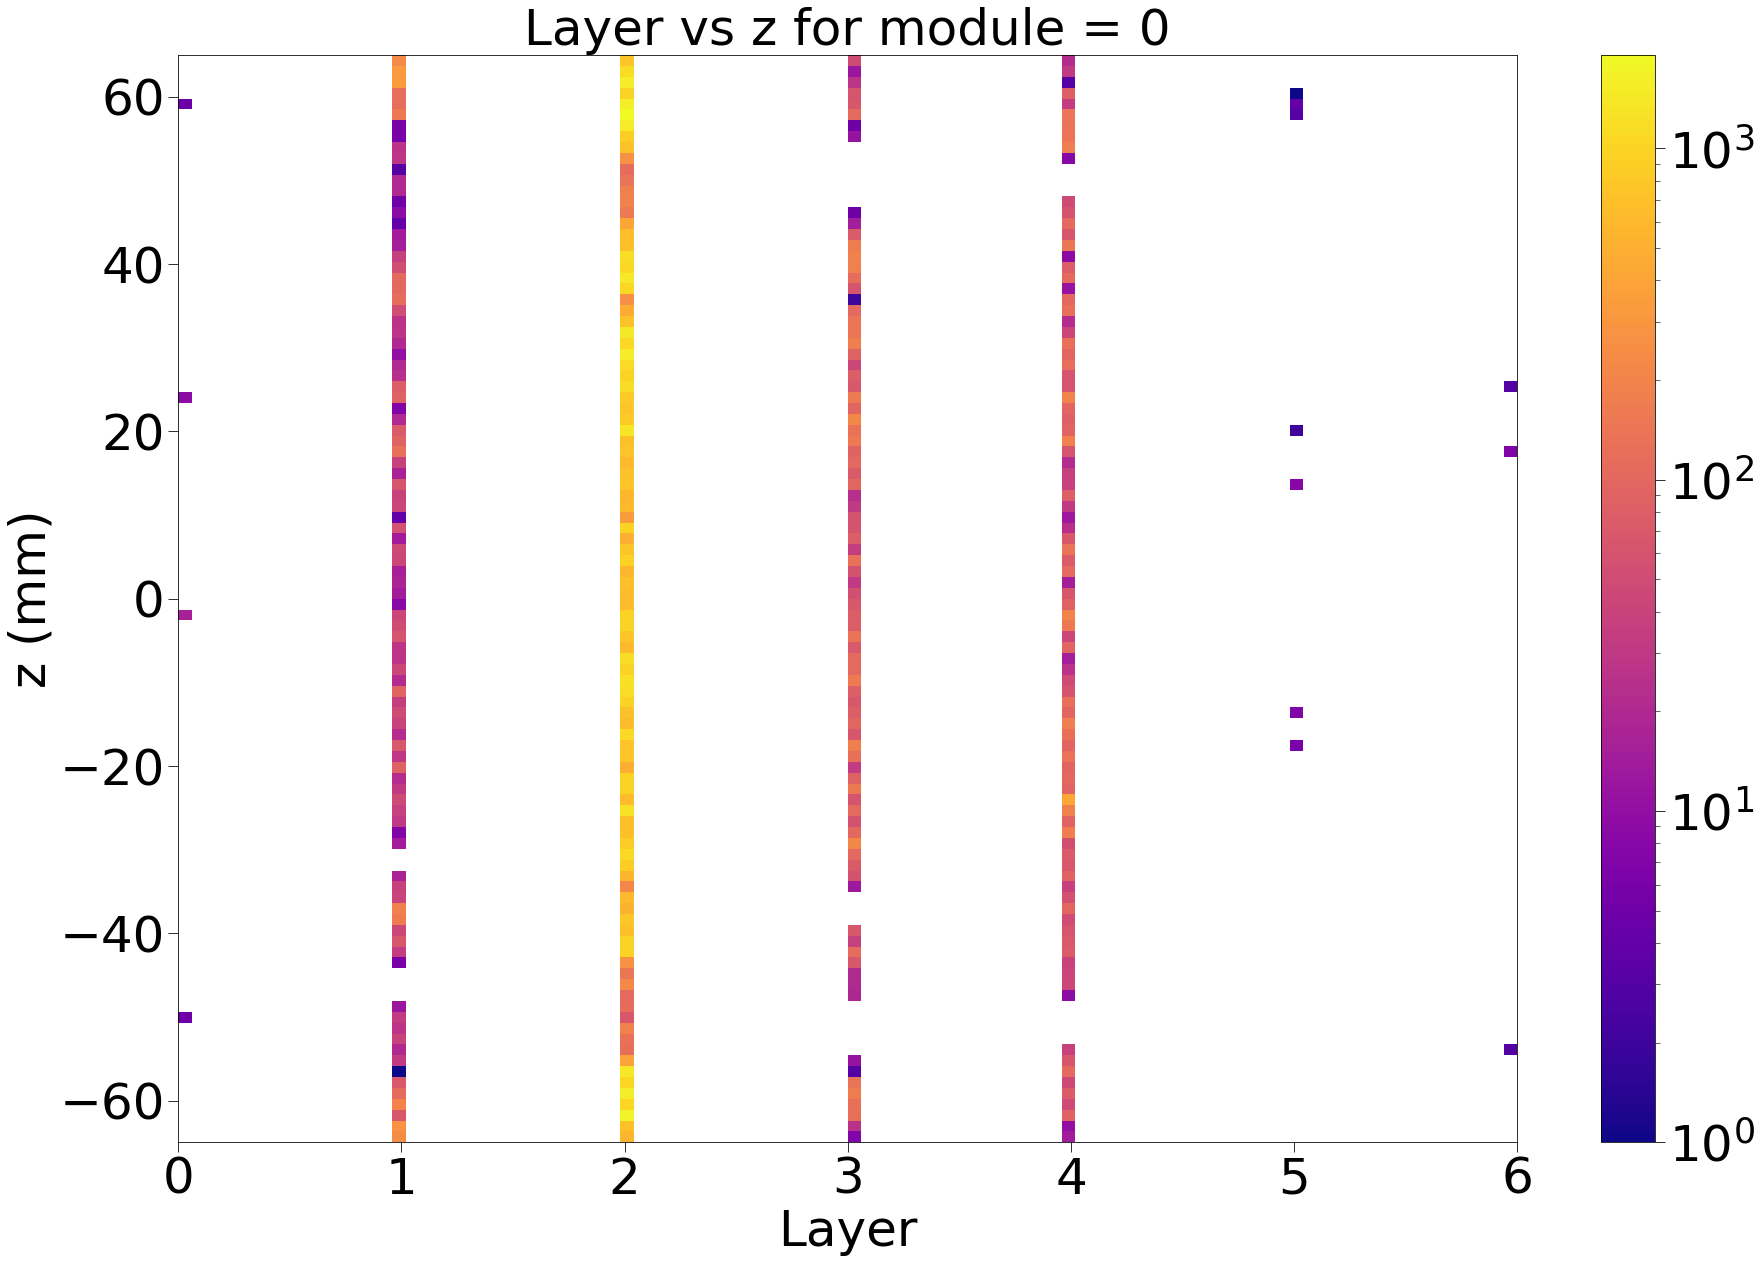

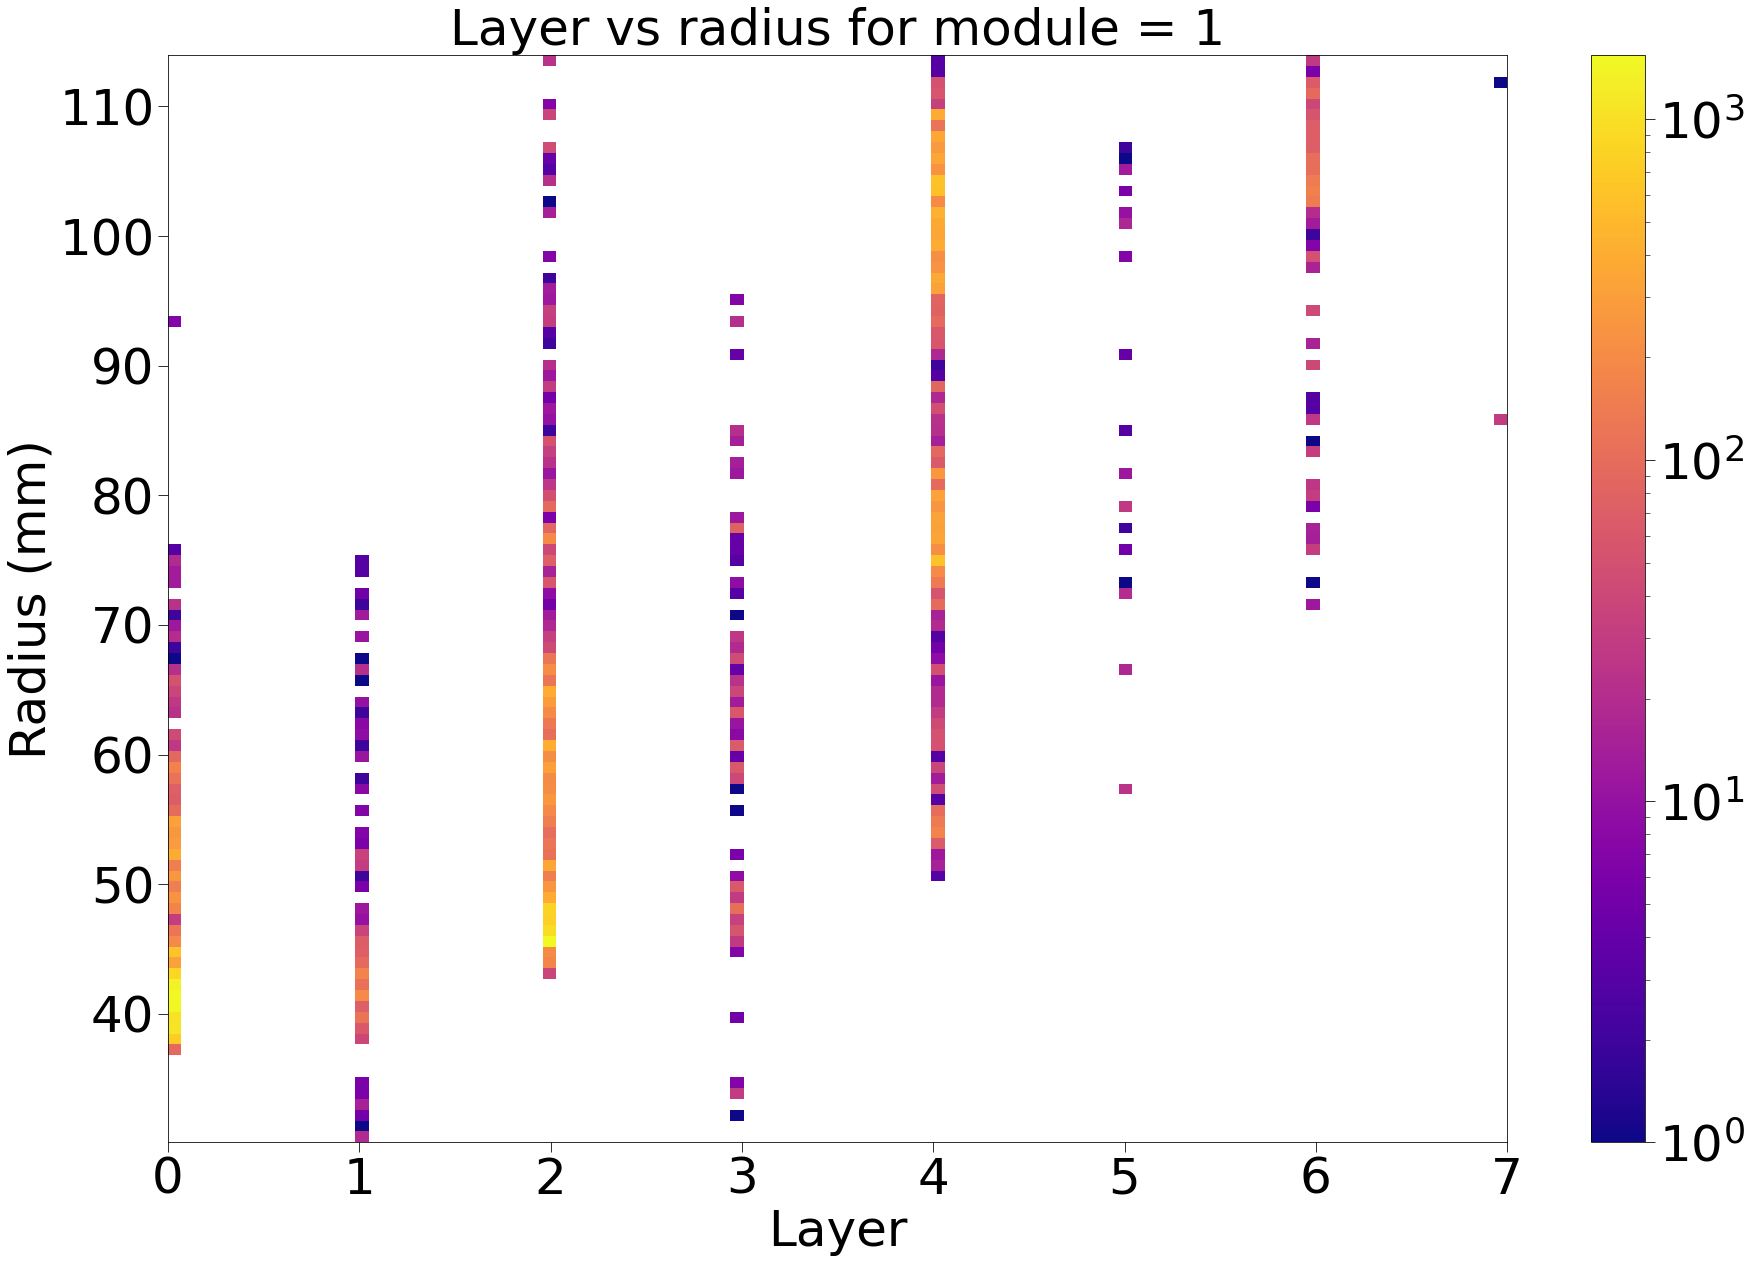

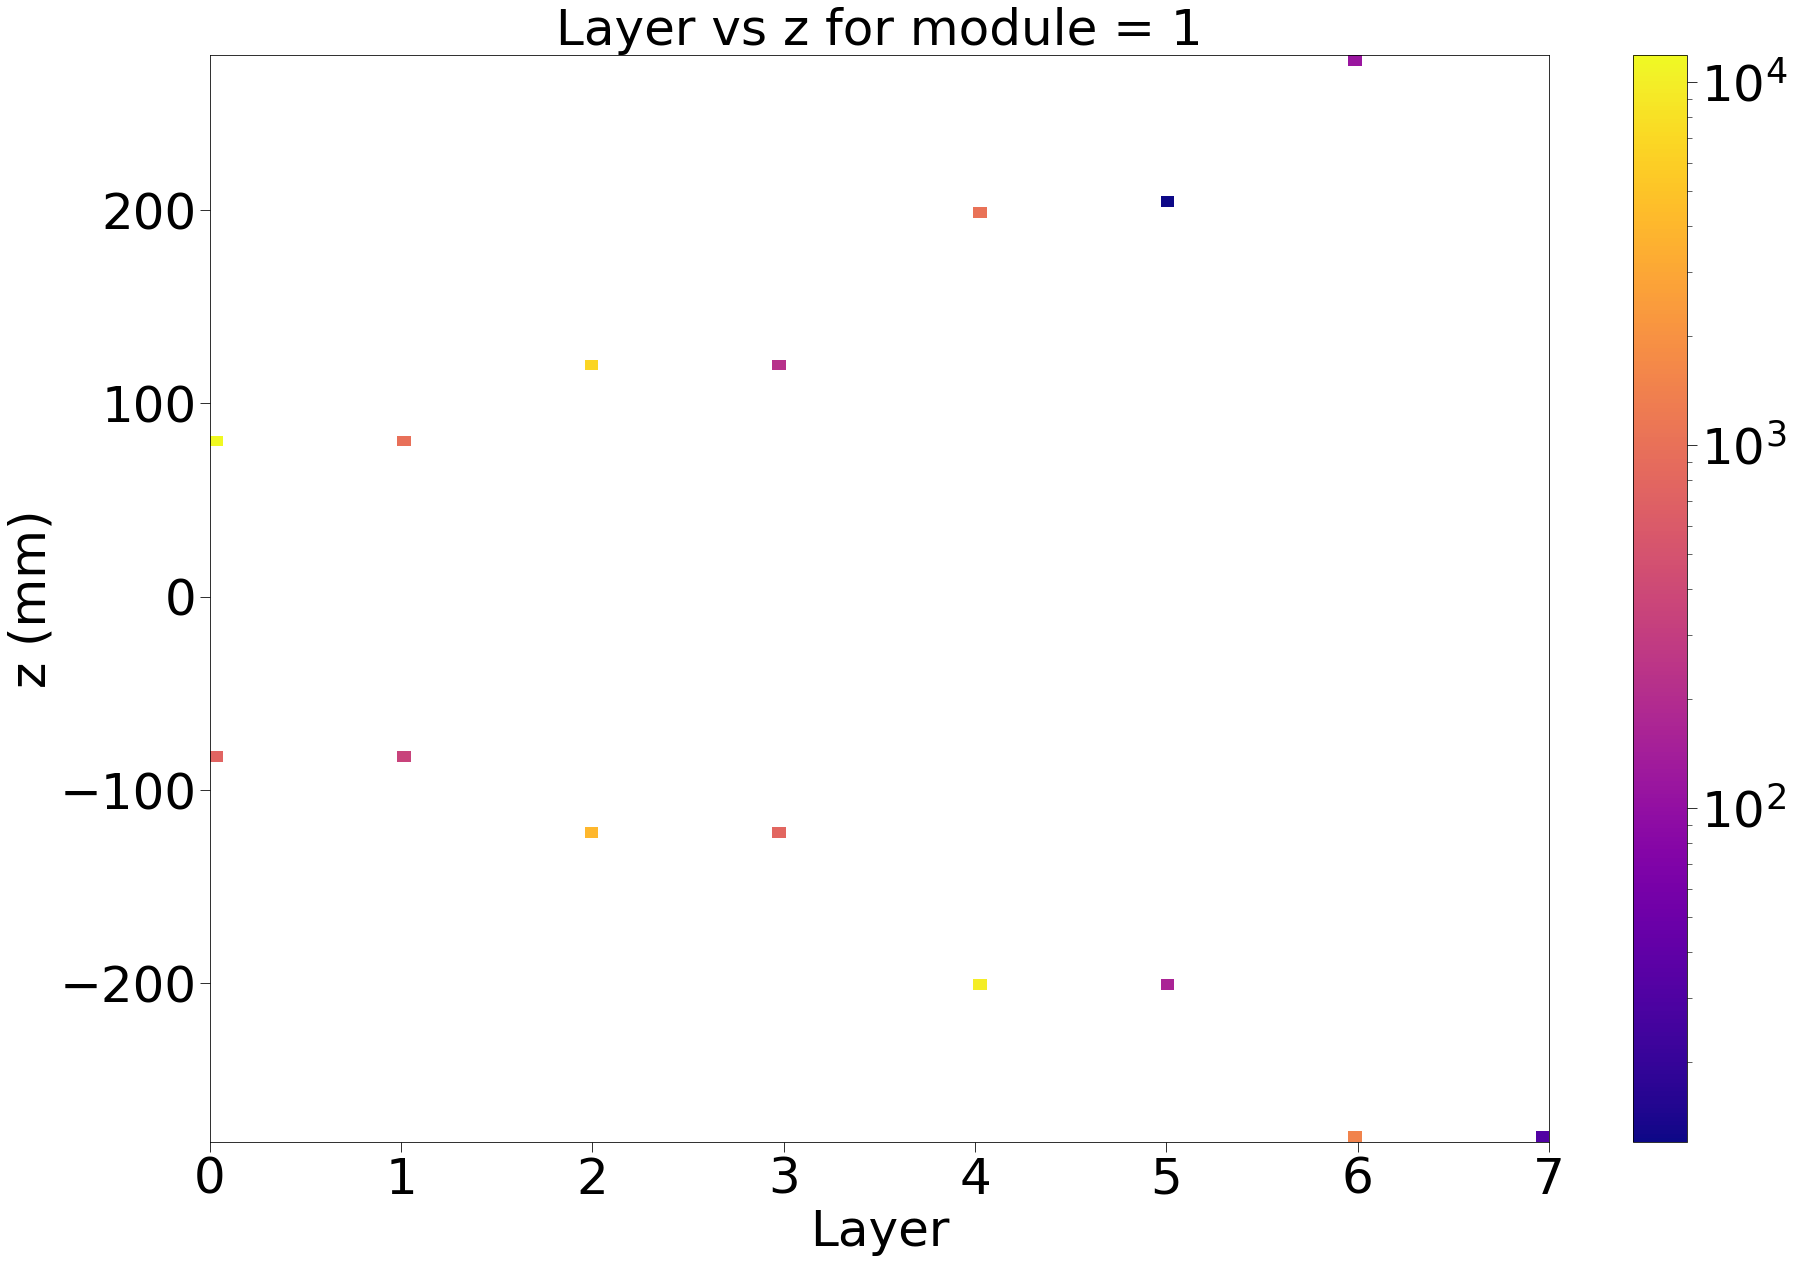

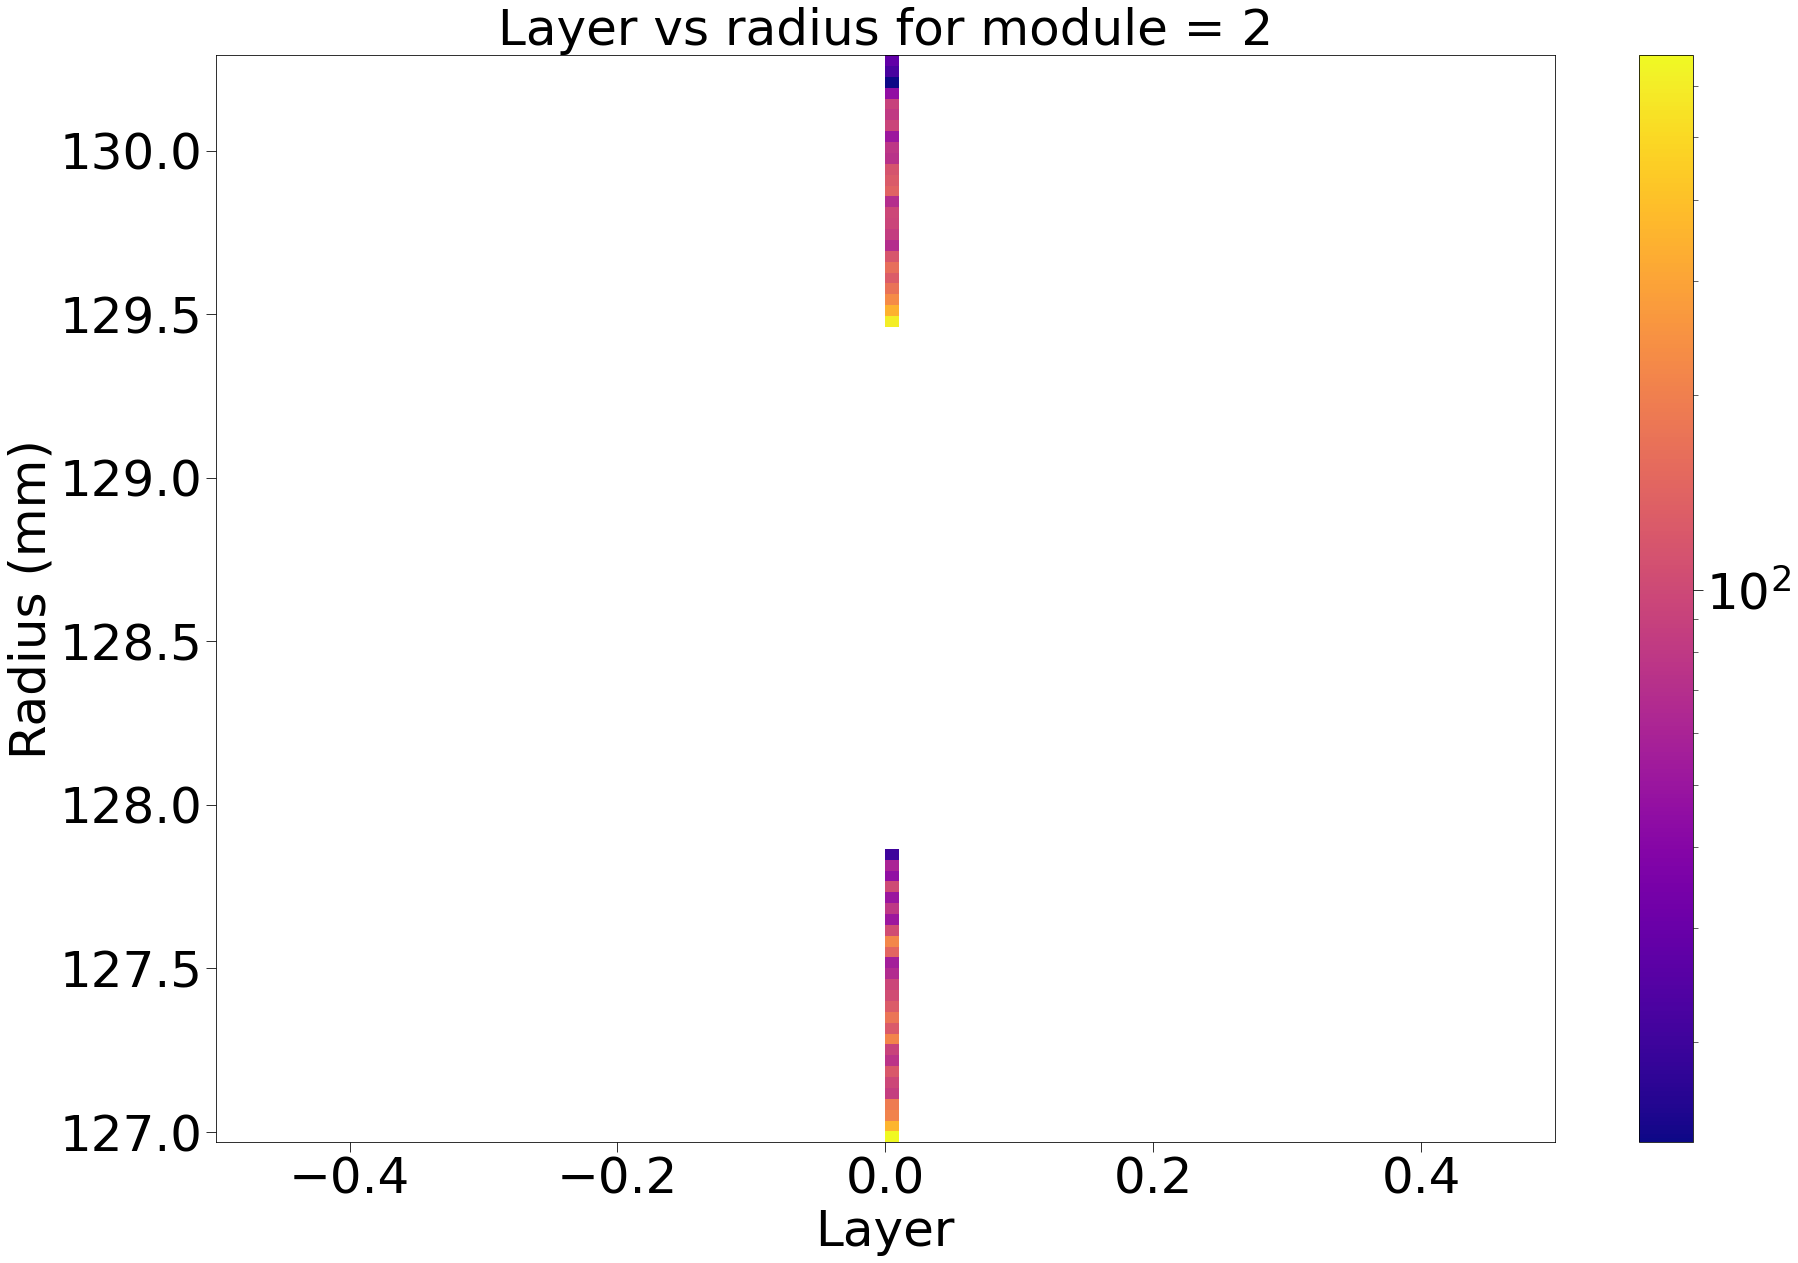

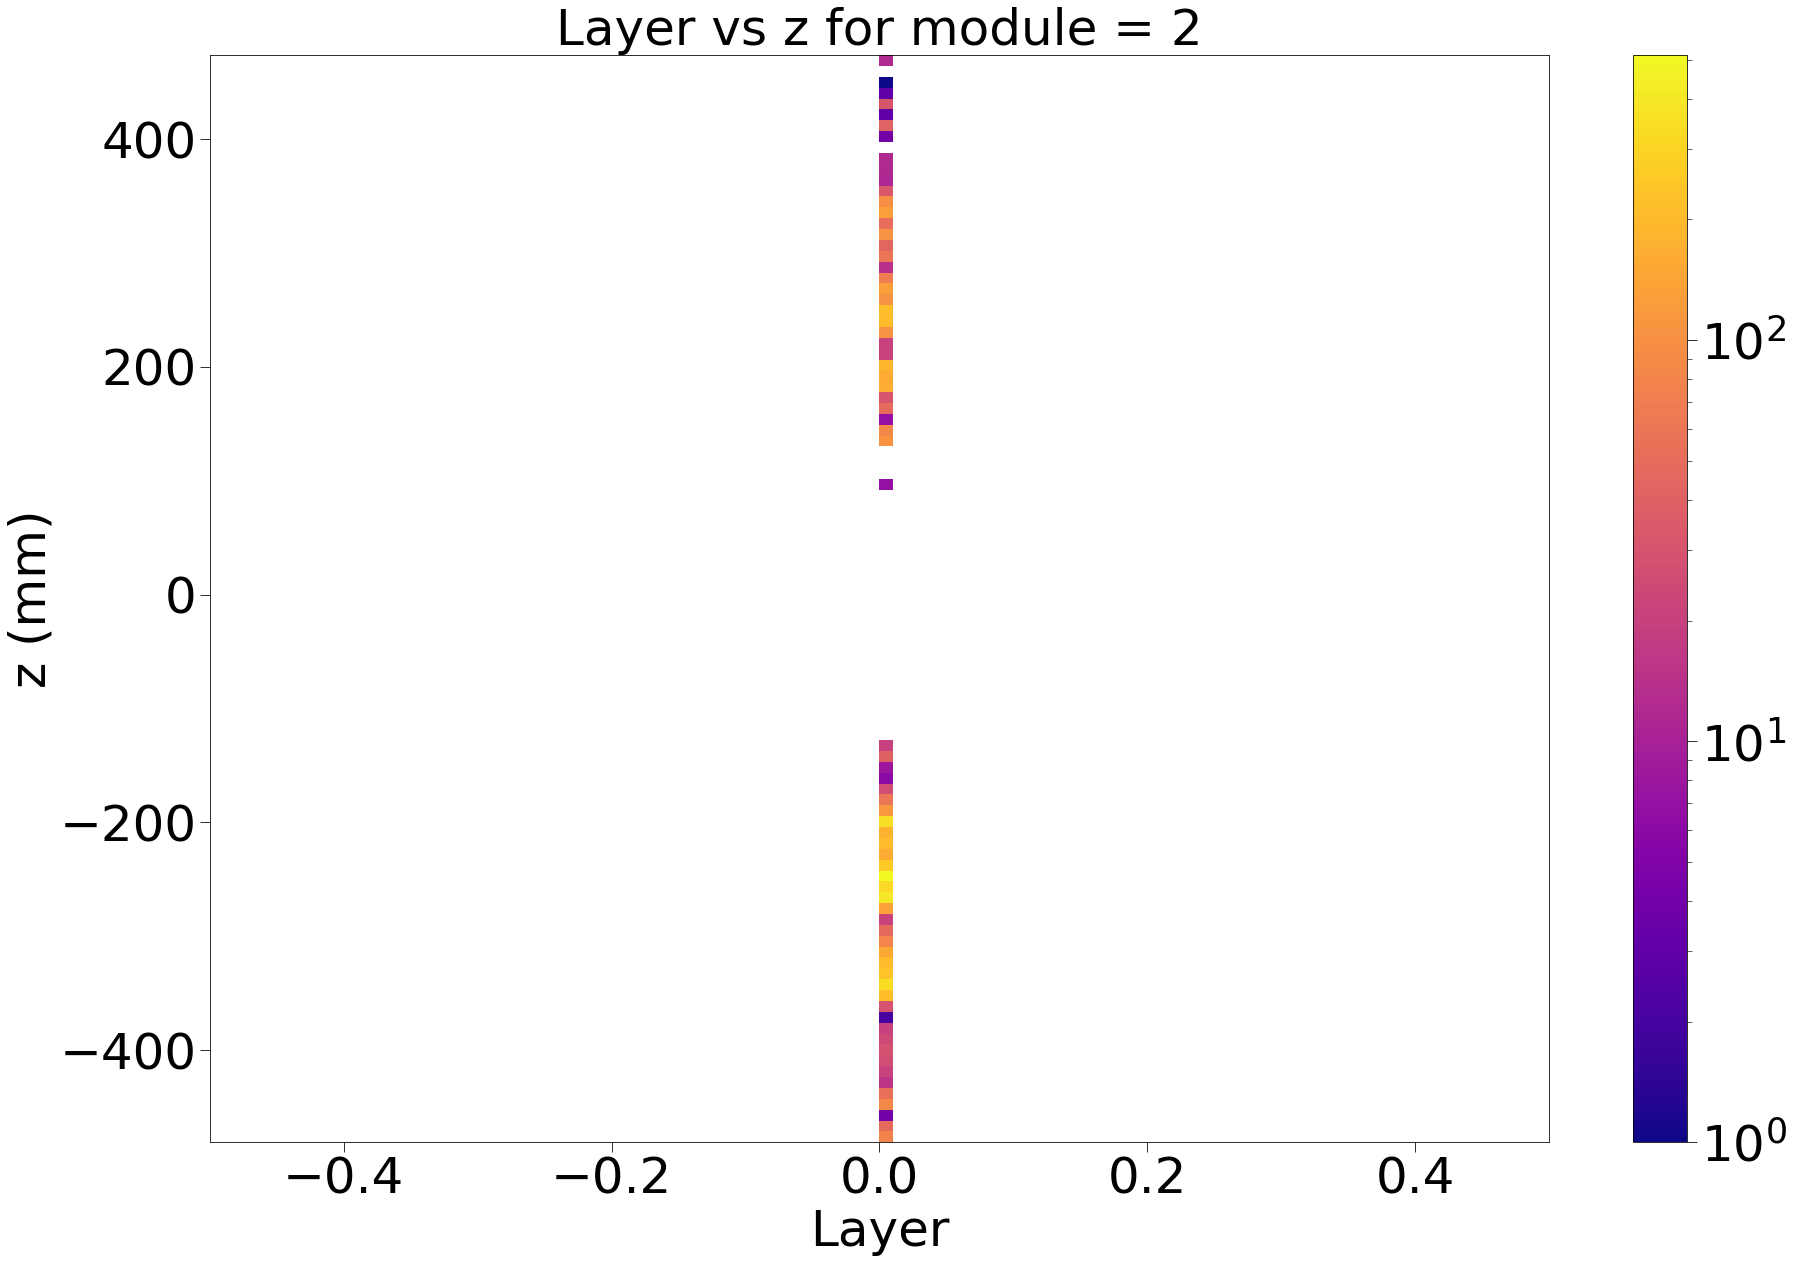

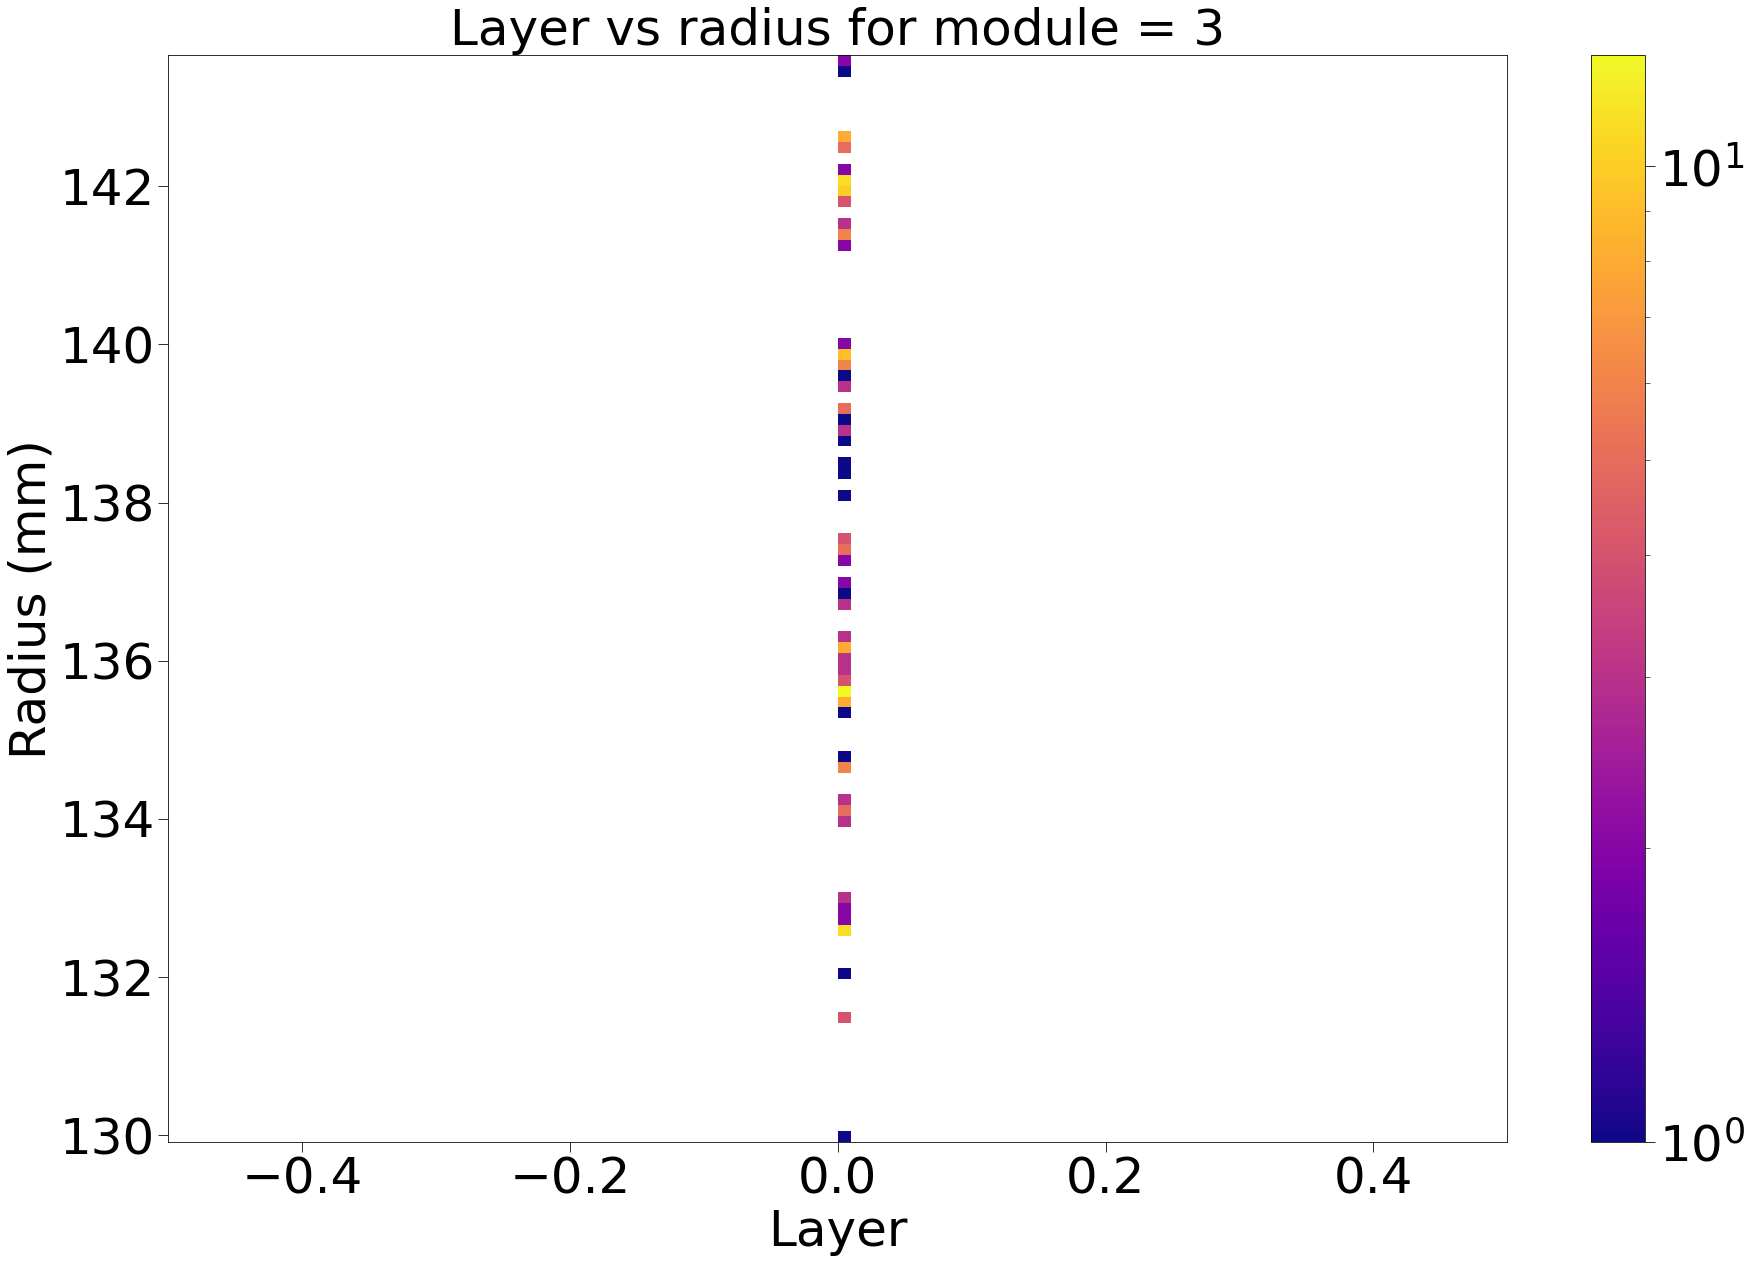

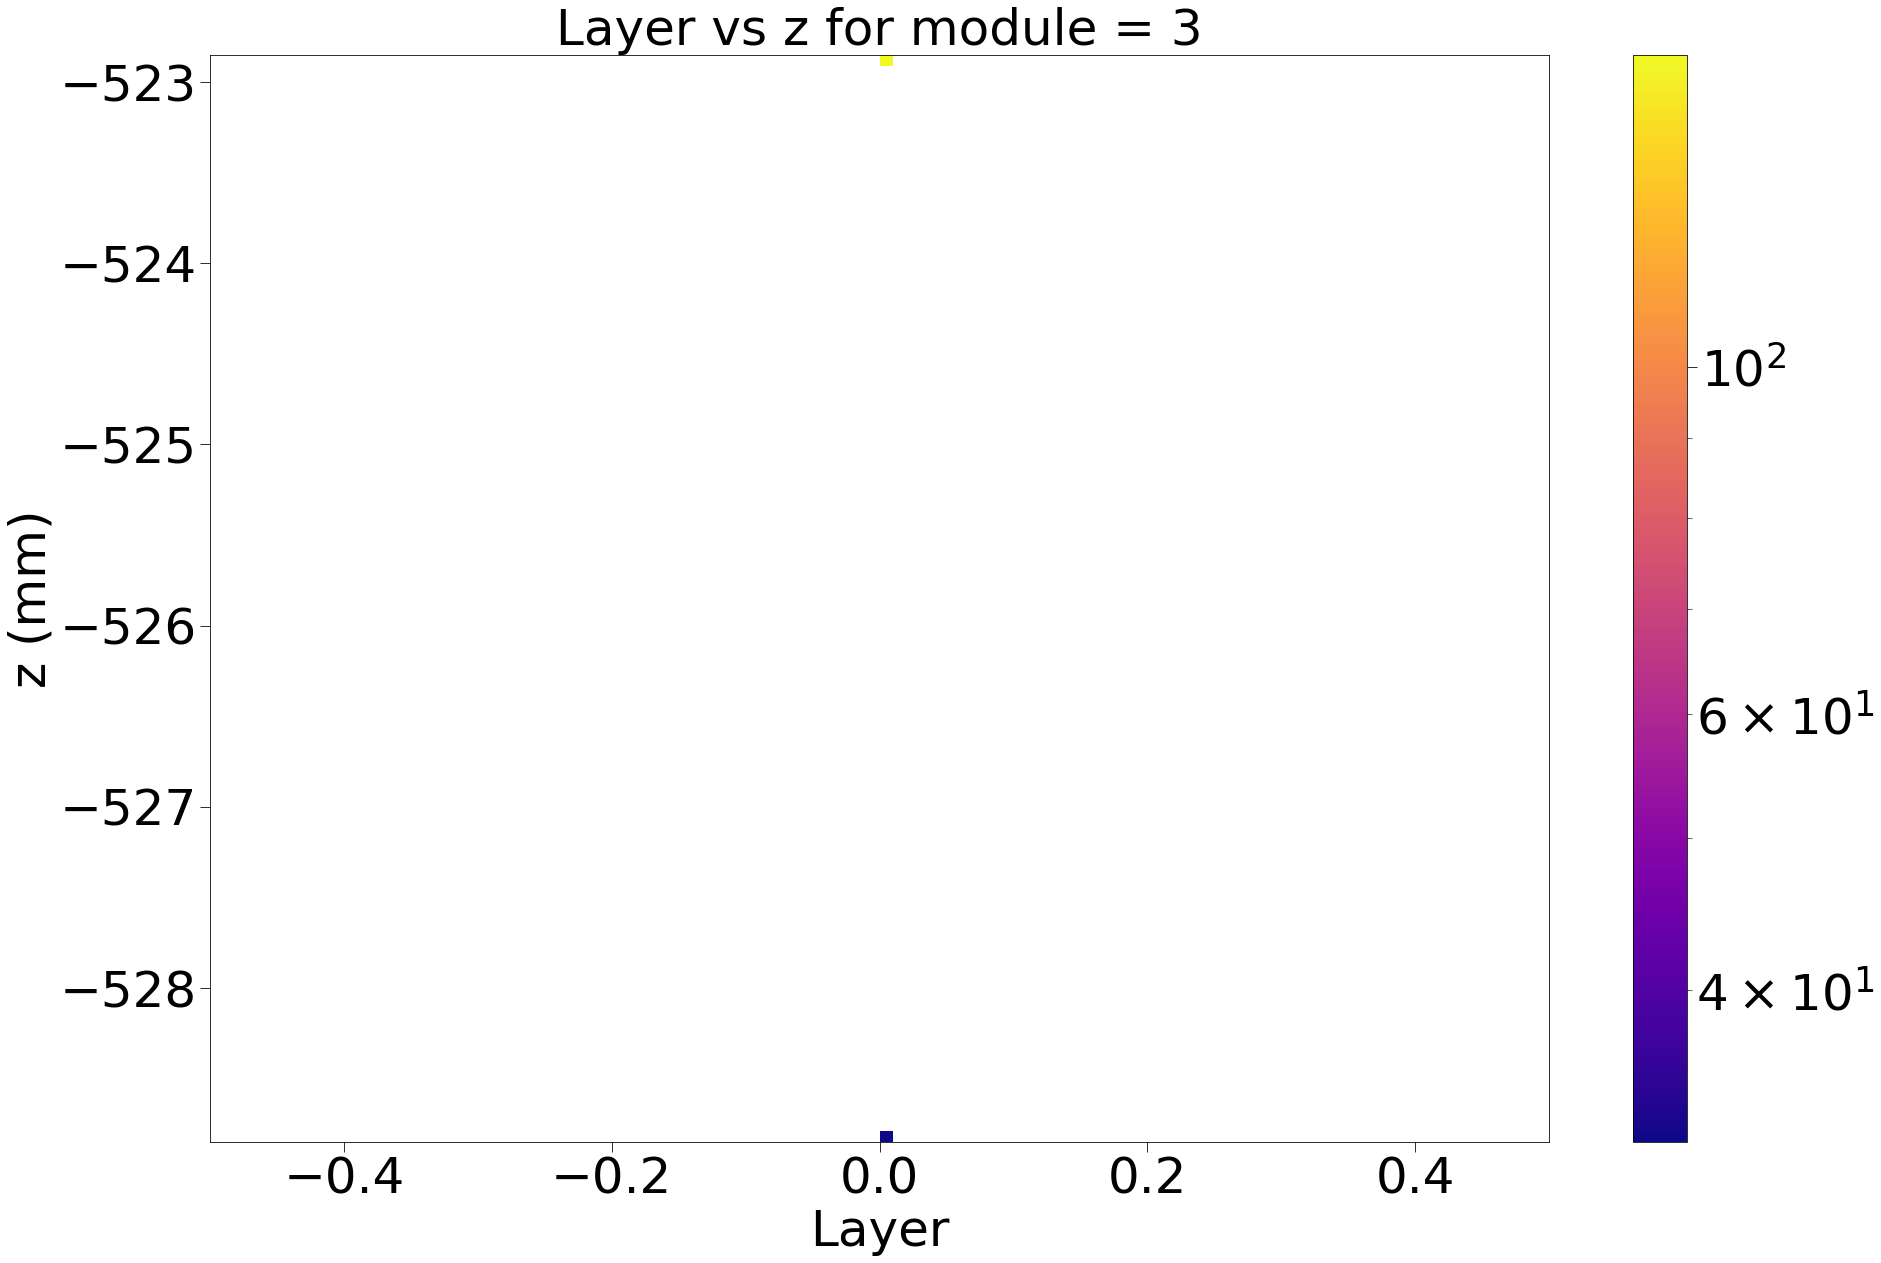

In [20]:
for i in range(int(max(secondHit.sys))):
    inMod=(secondHitBIB.sys==(i+1))
    plot2DHistogram(secondHitBIB.lay[inMod], secondHitBIB.r[inMod], bins=100, label=("Layer vs radius for module = "+str(i)+";Layer;Radius (mm)"))
    plot2DHistogram(secondHitBIB.lay[inMod], secondHitBIB.z[inMod], bins=100, label=("Layer vs z for module = "+str(i)+";Layer;z (mm)"))

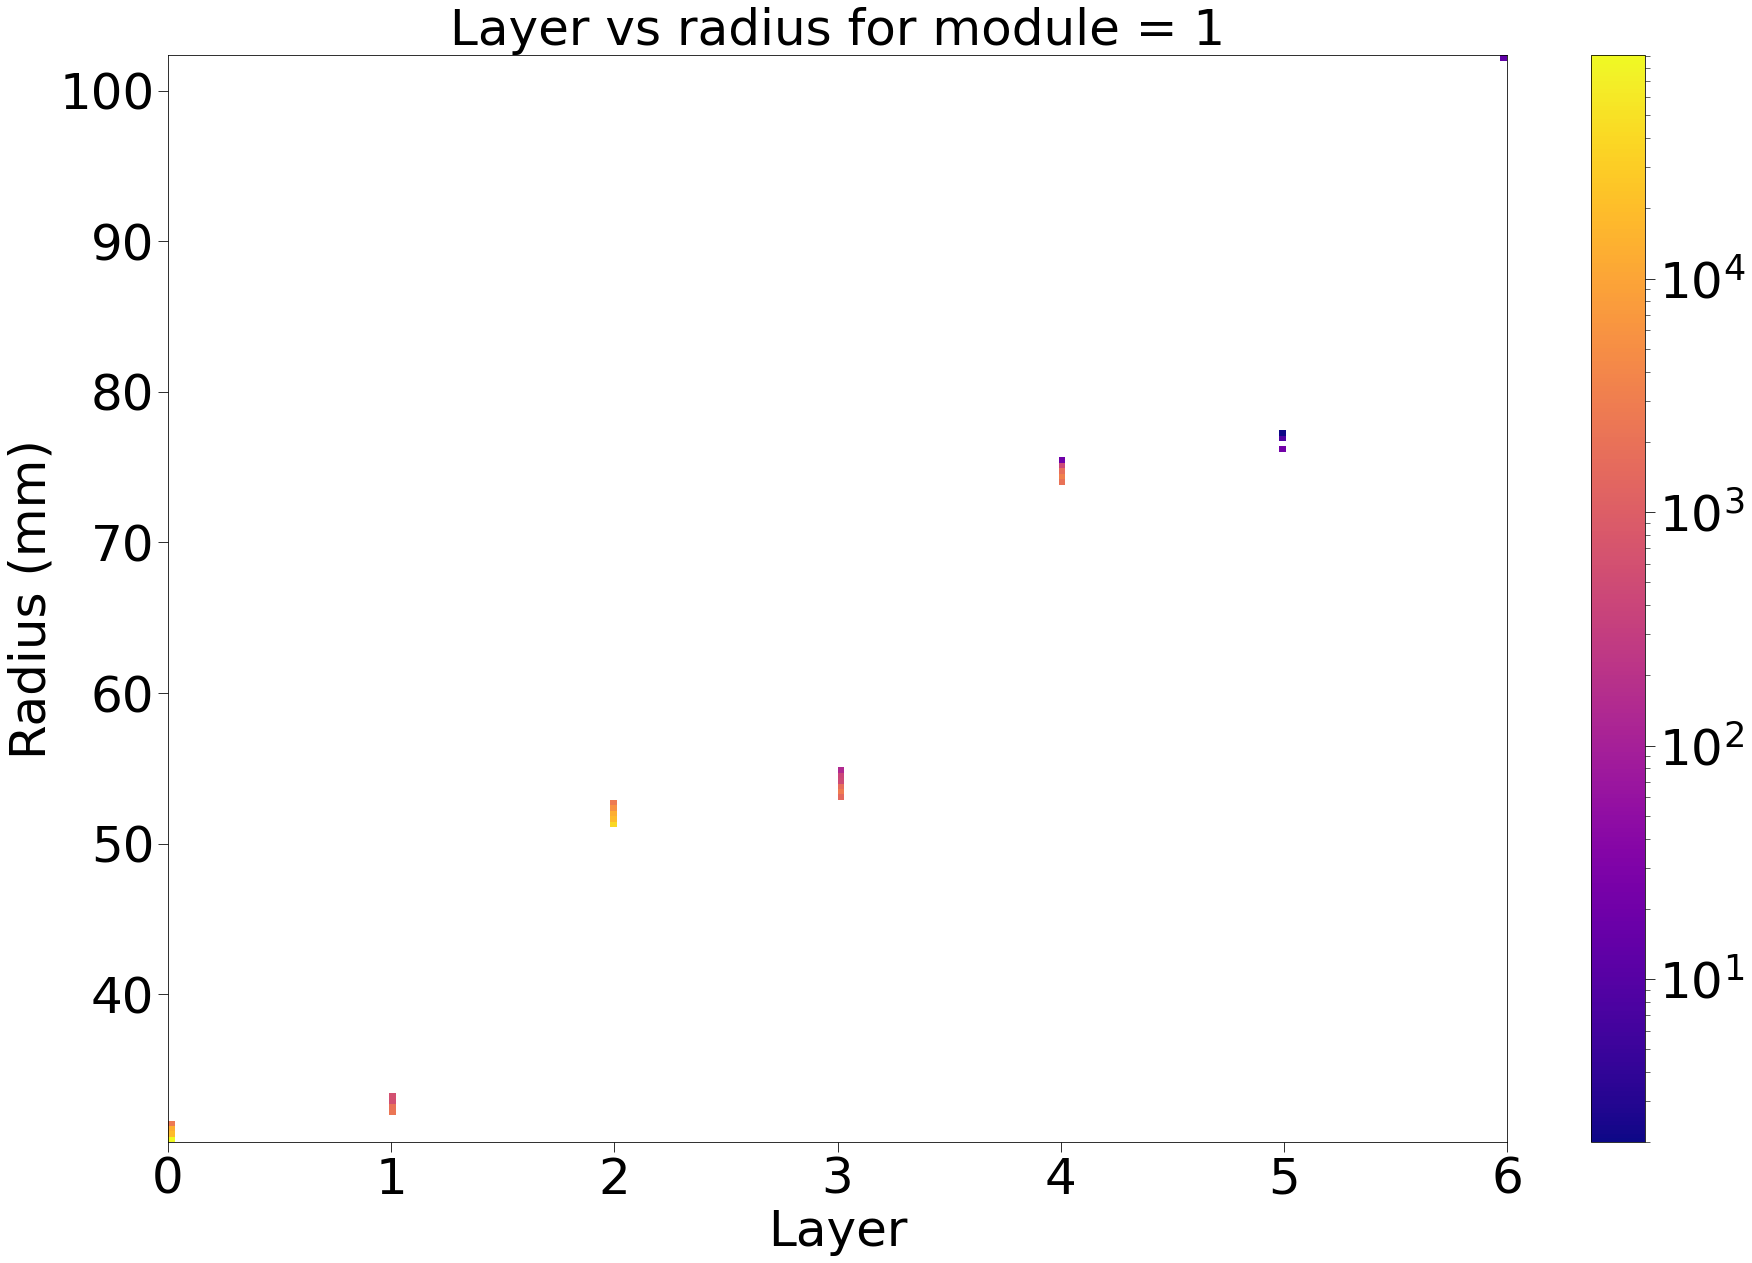

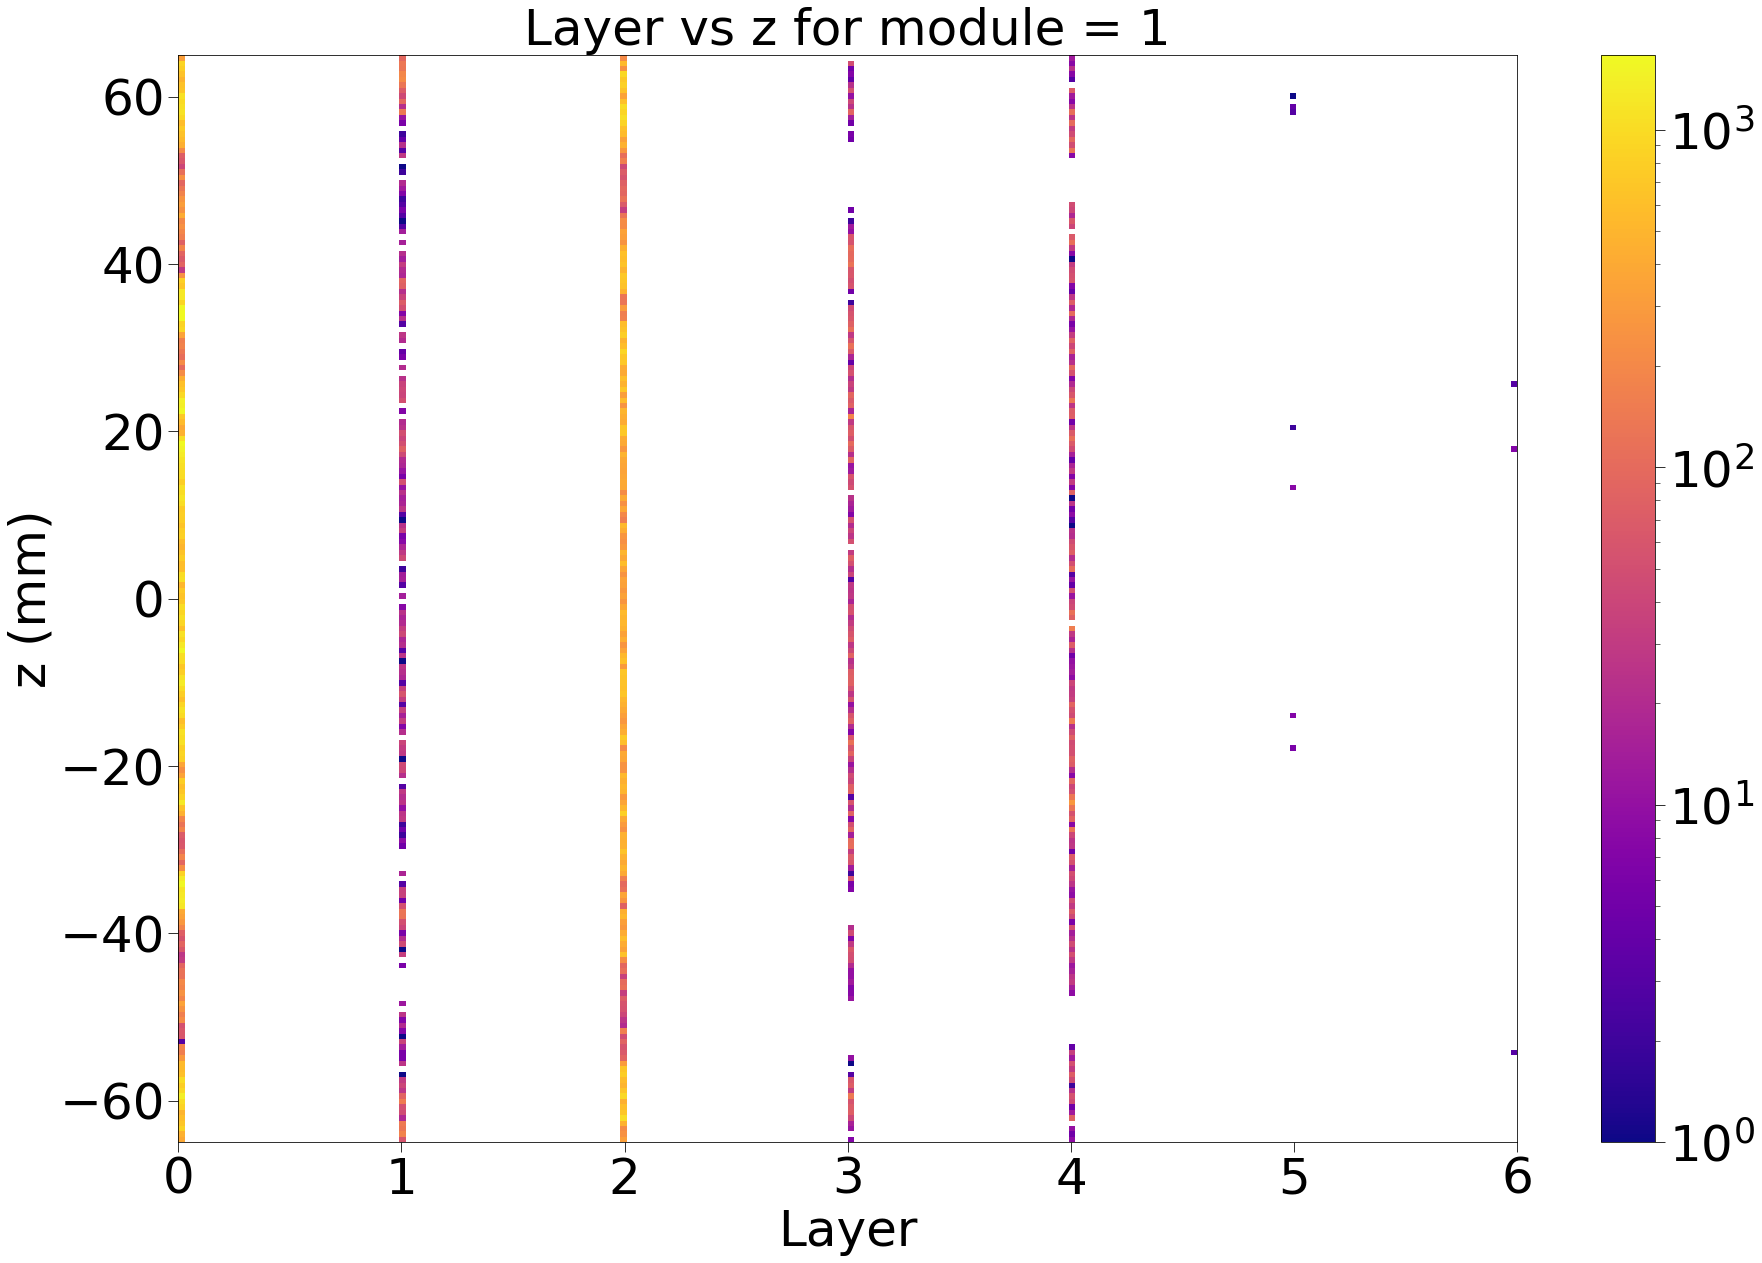

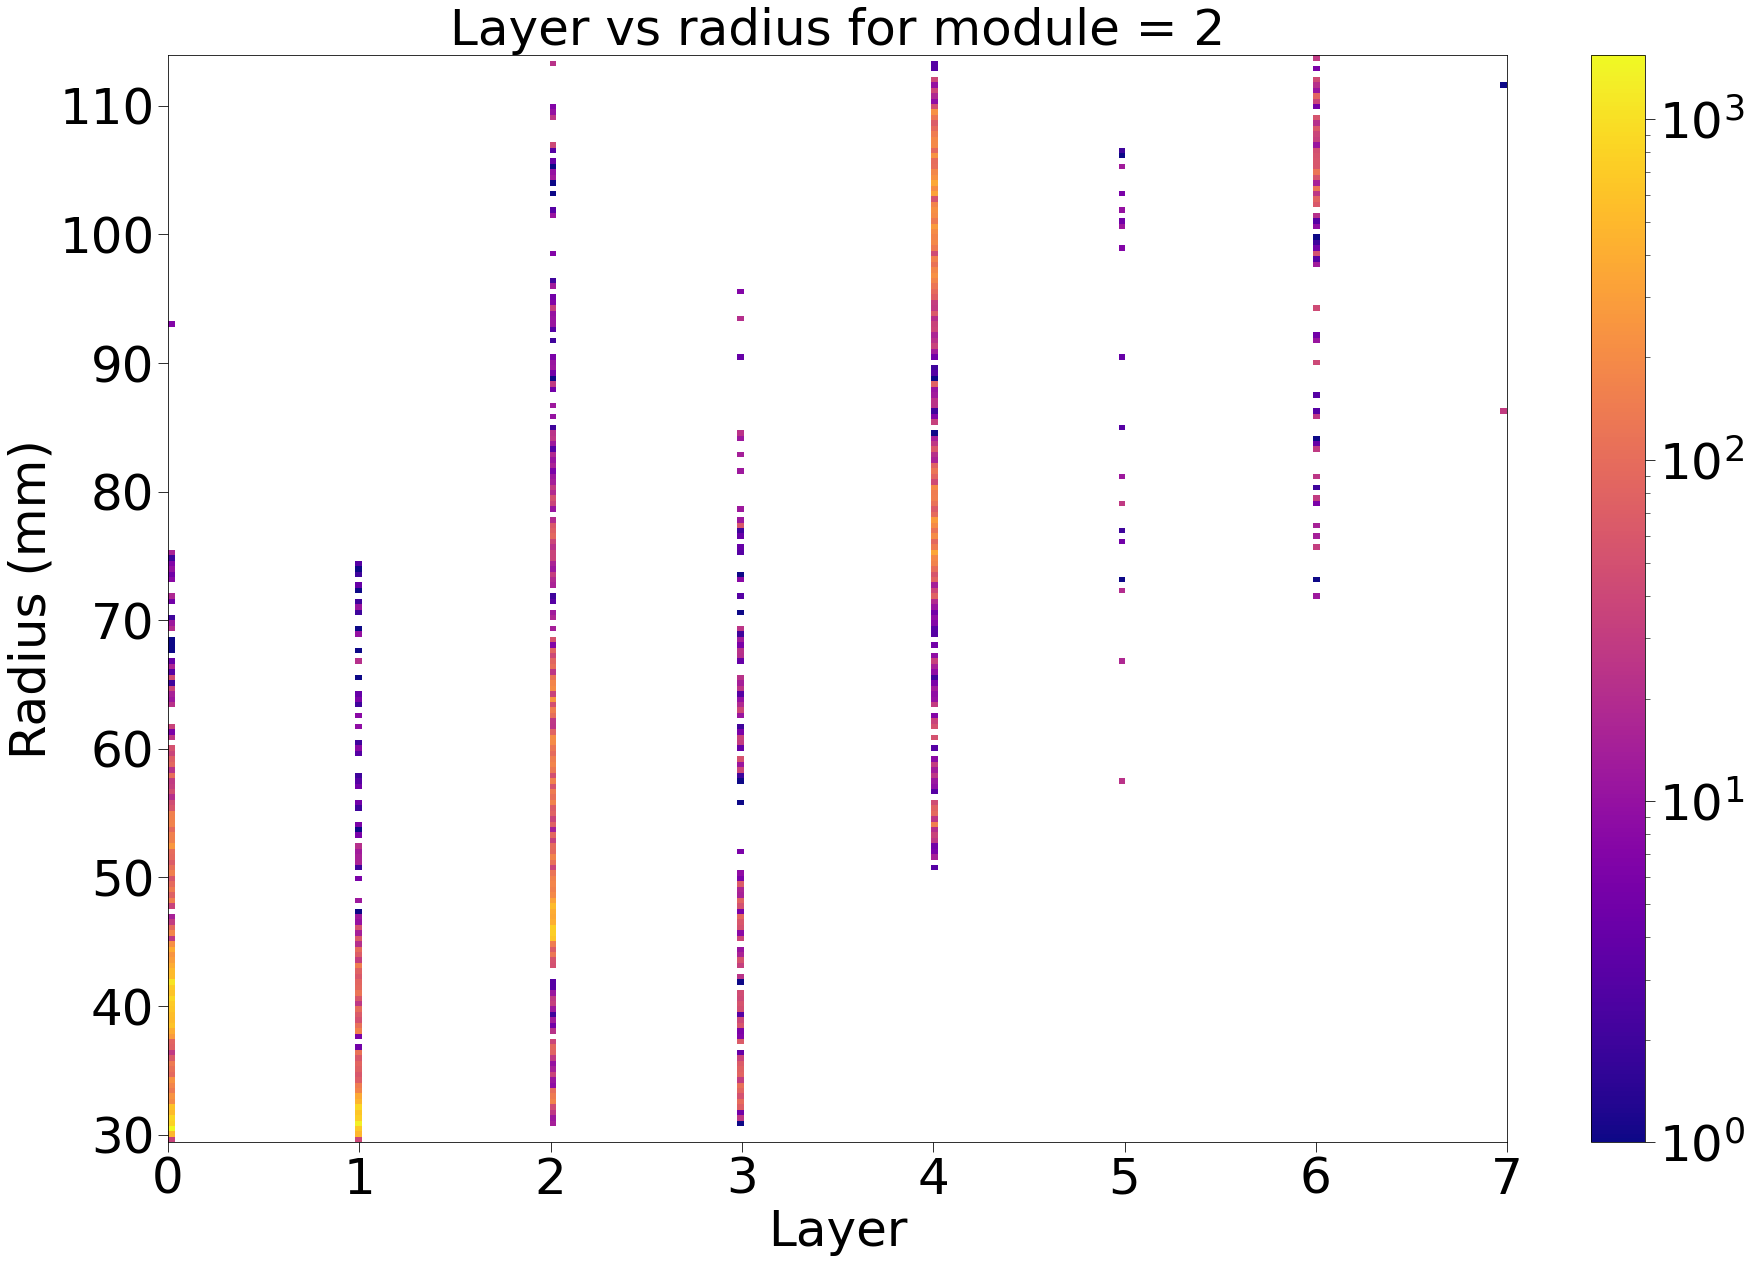

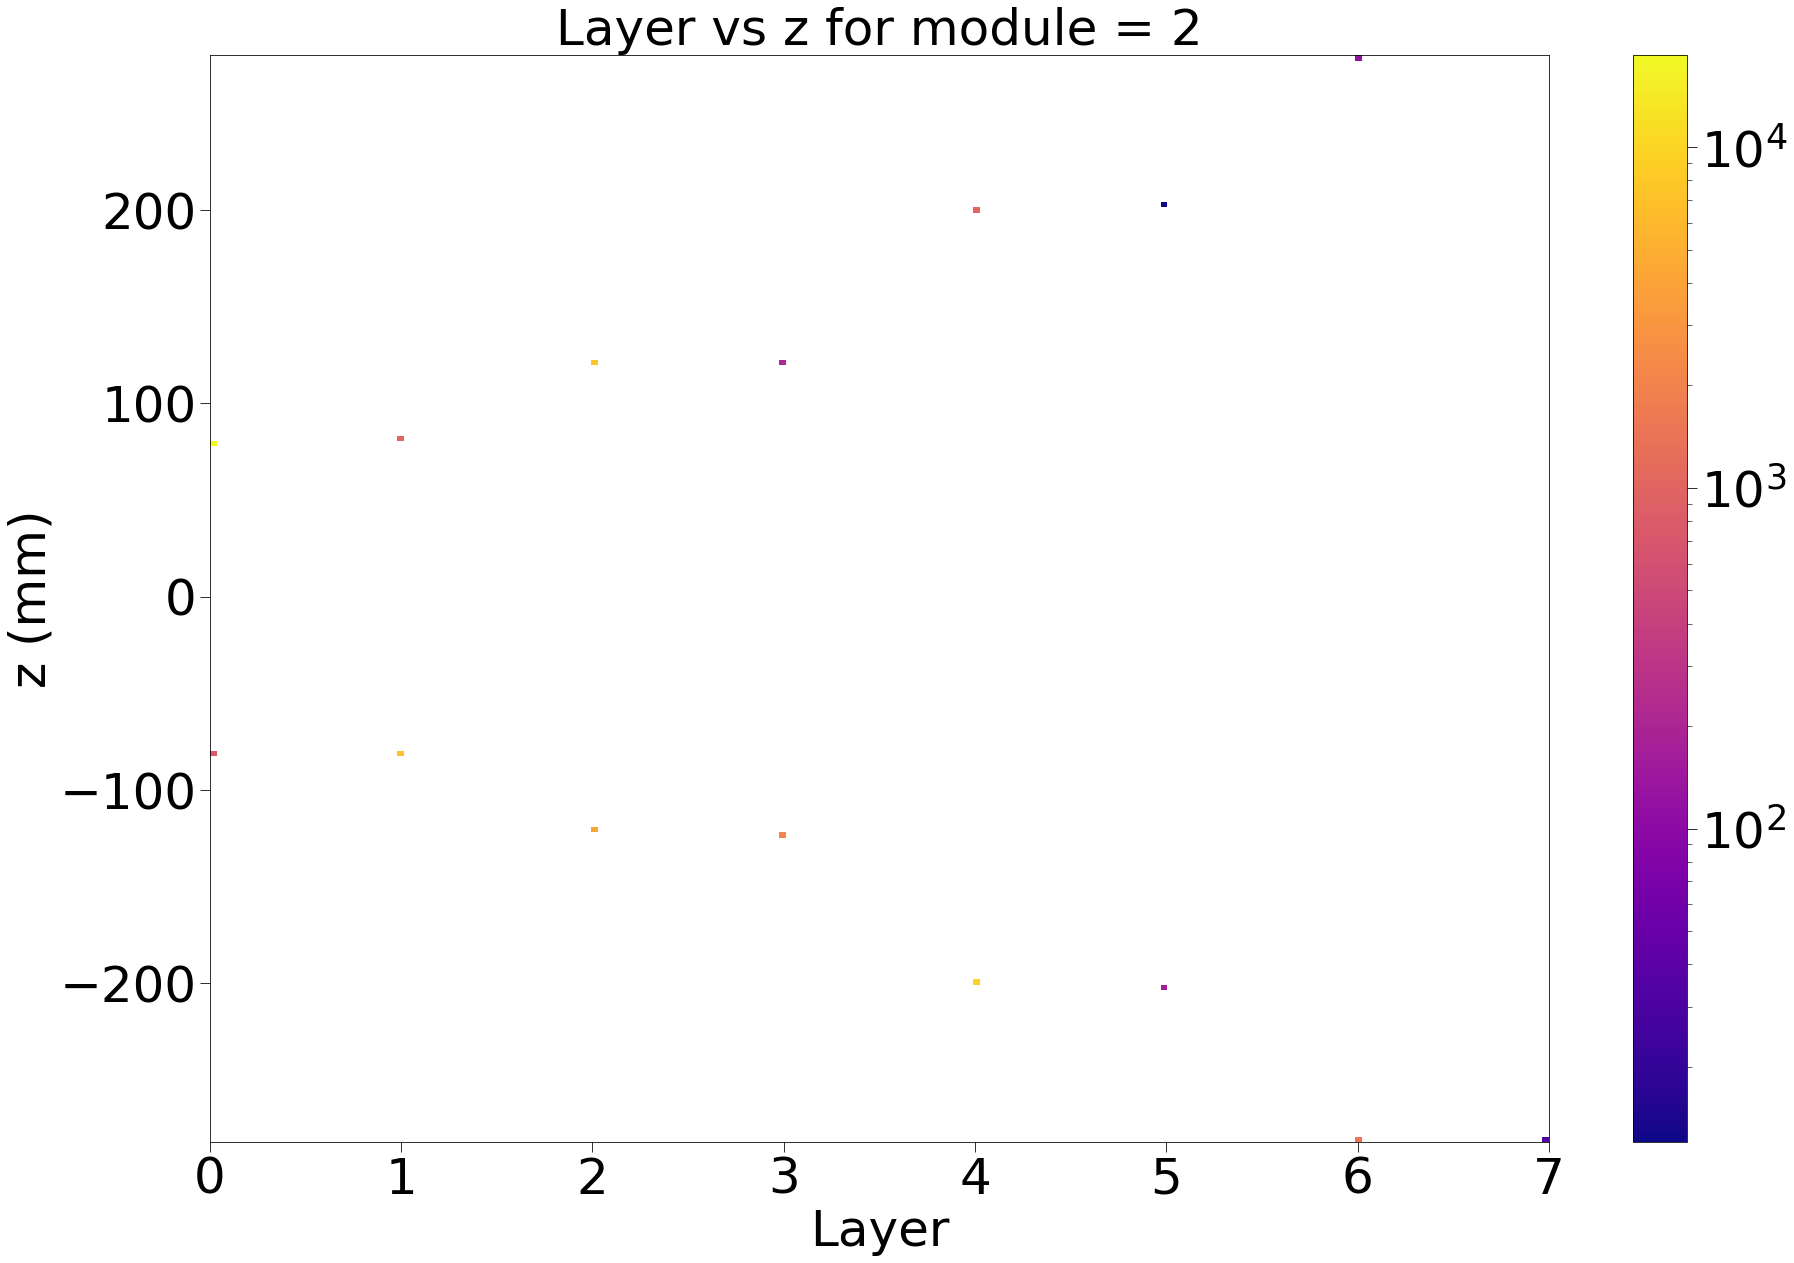

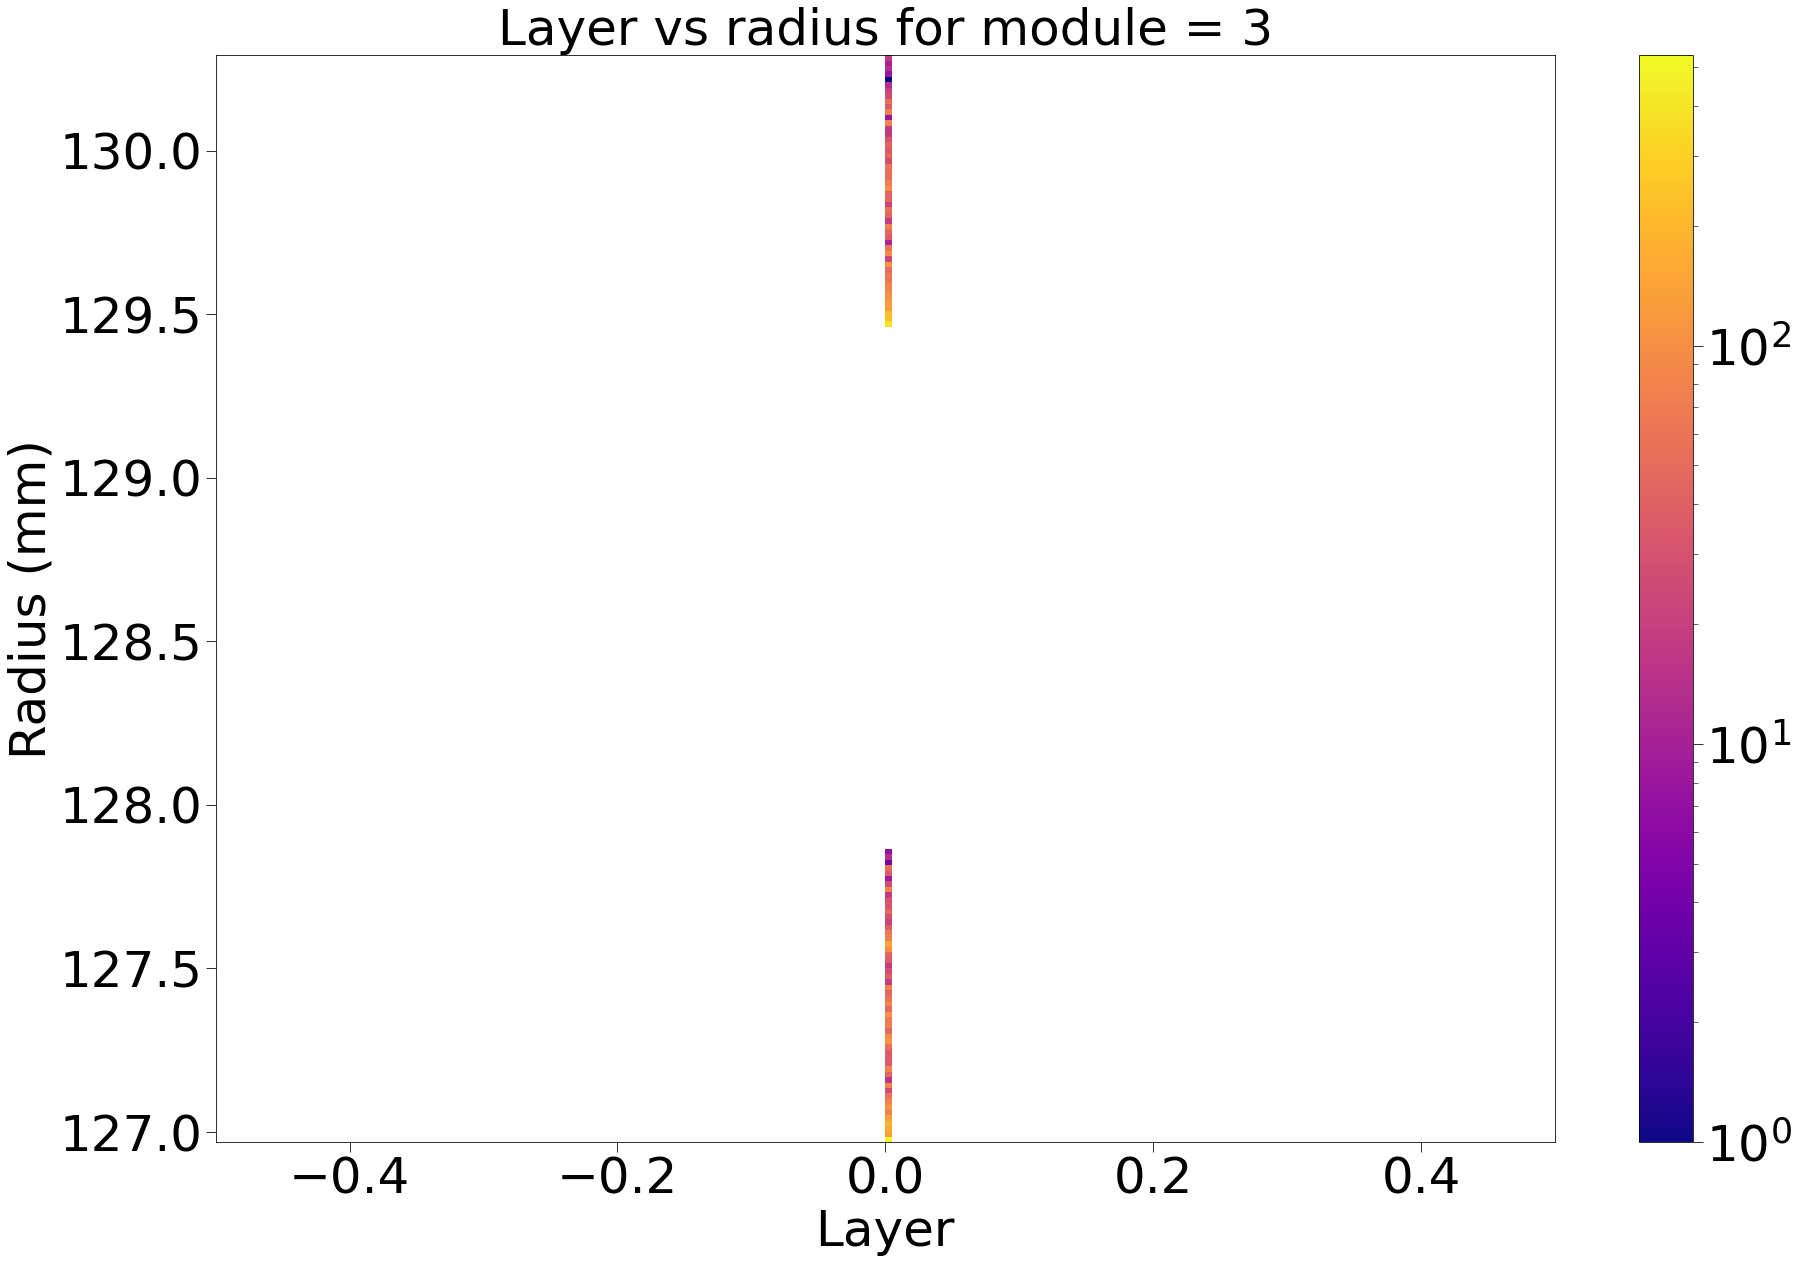

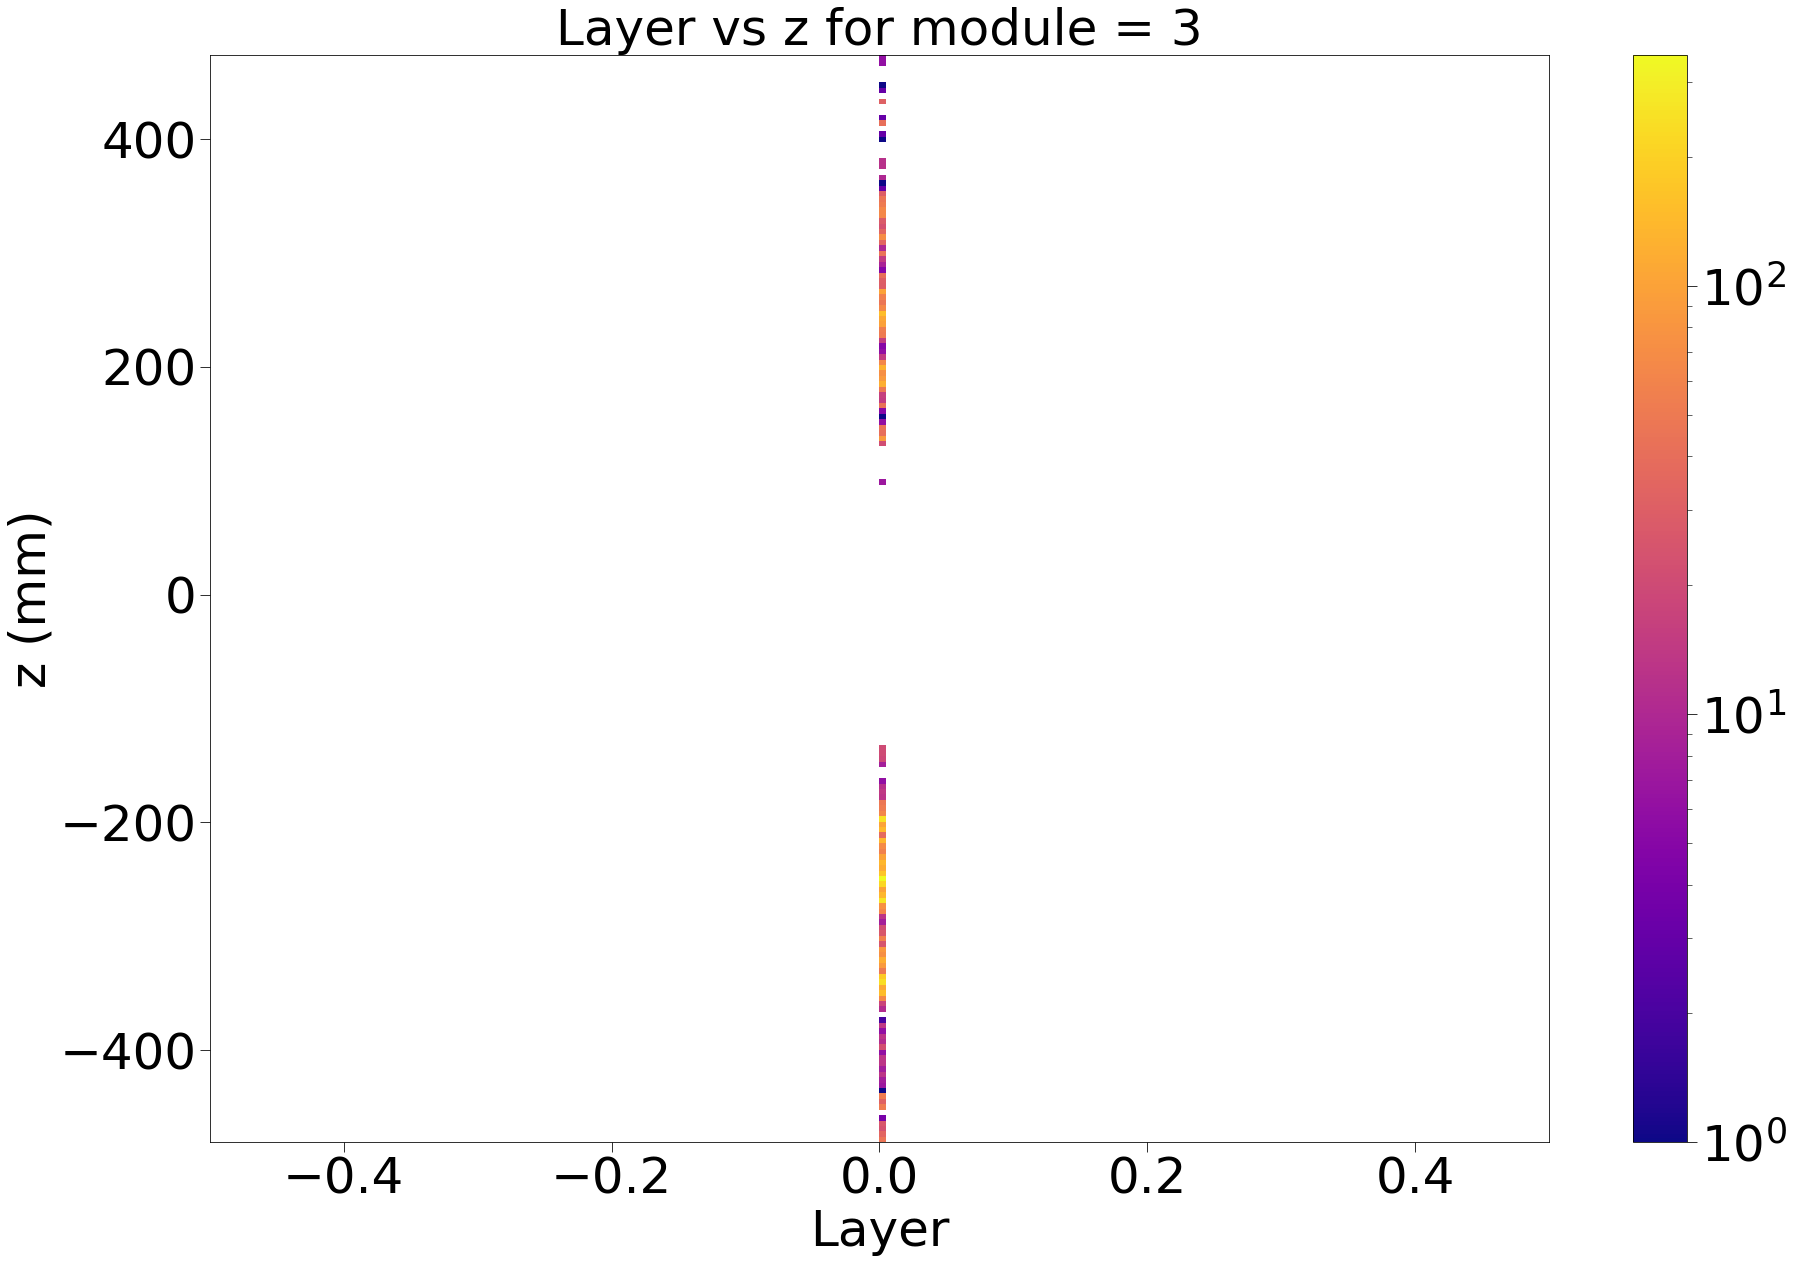

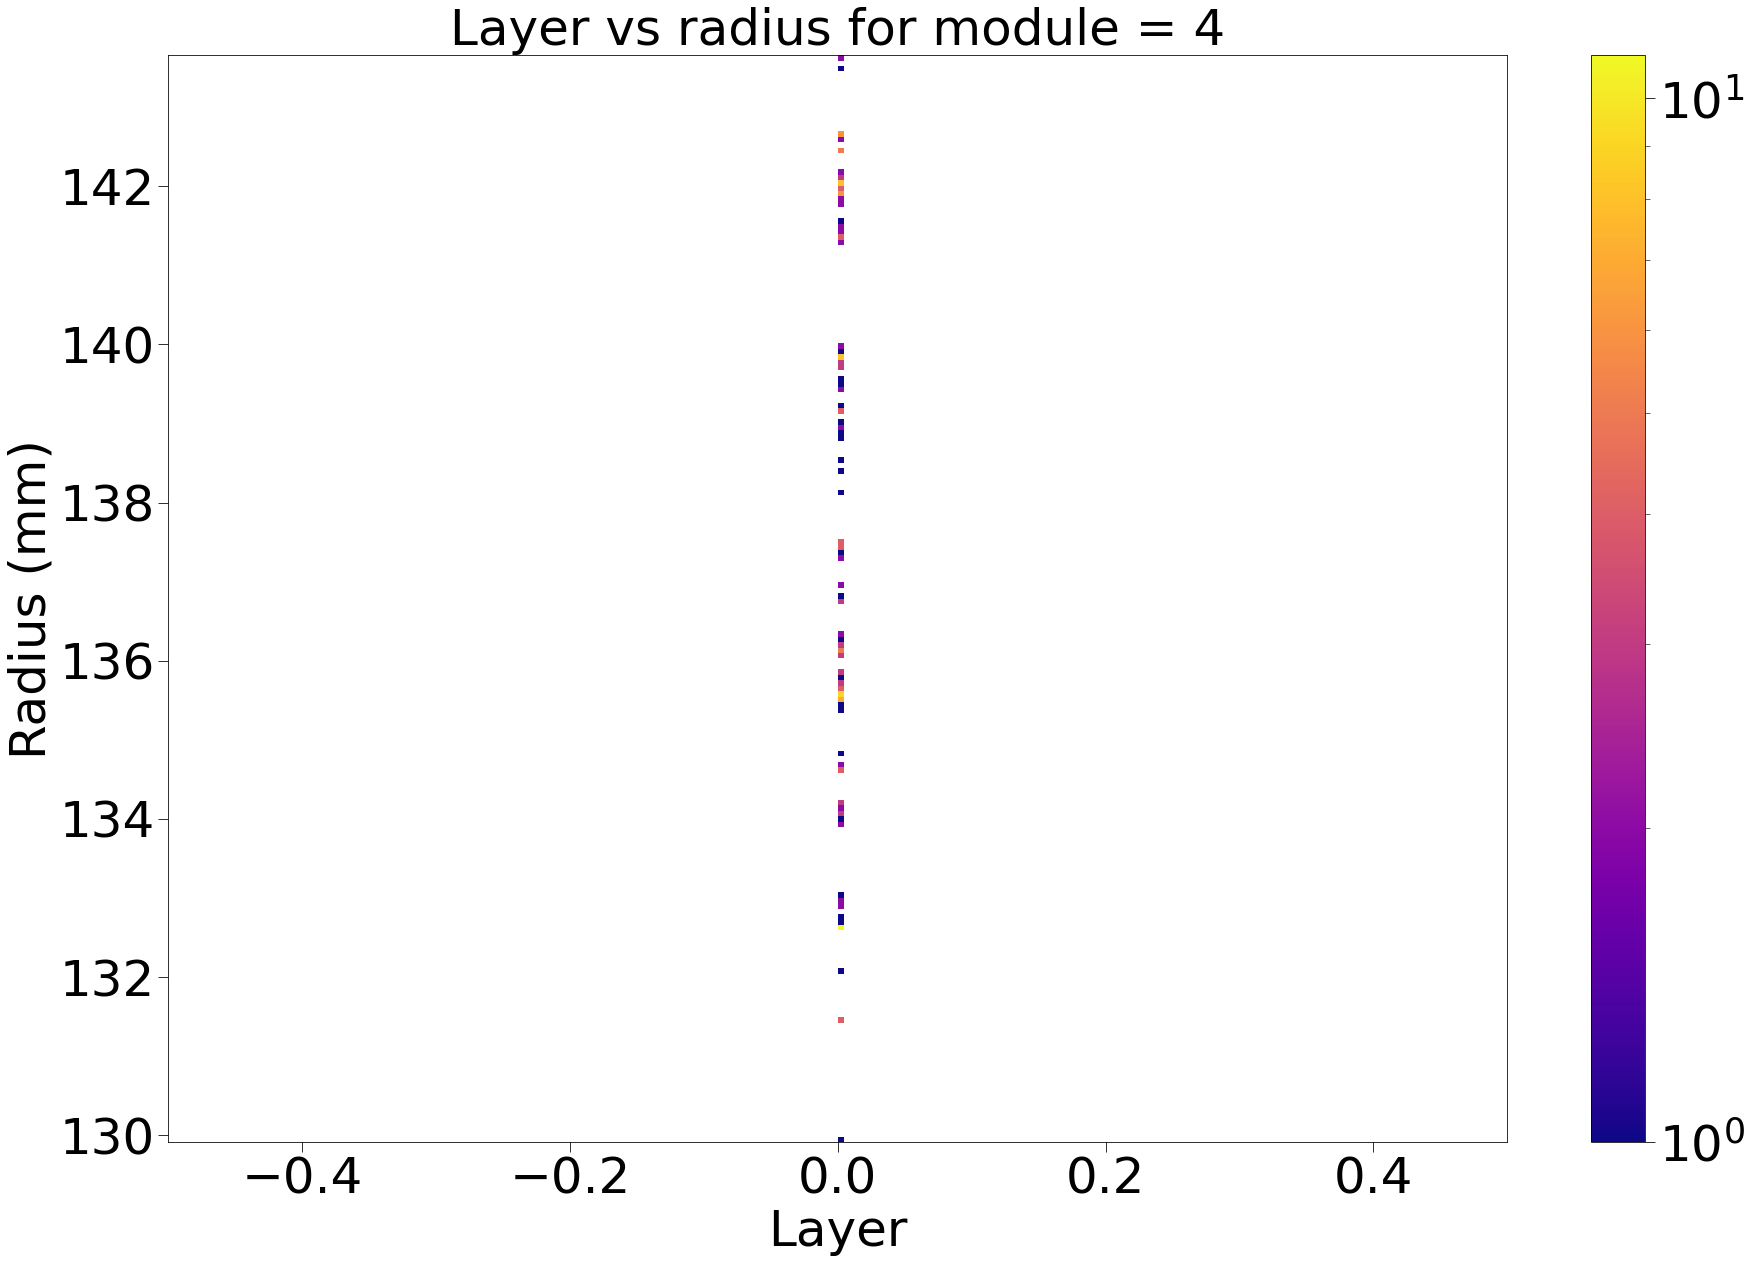

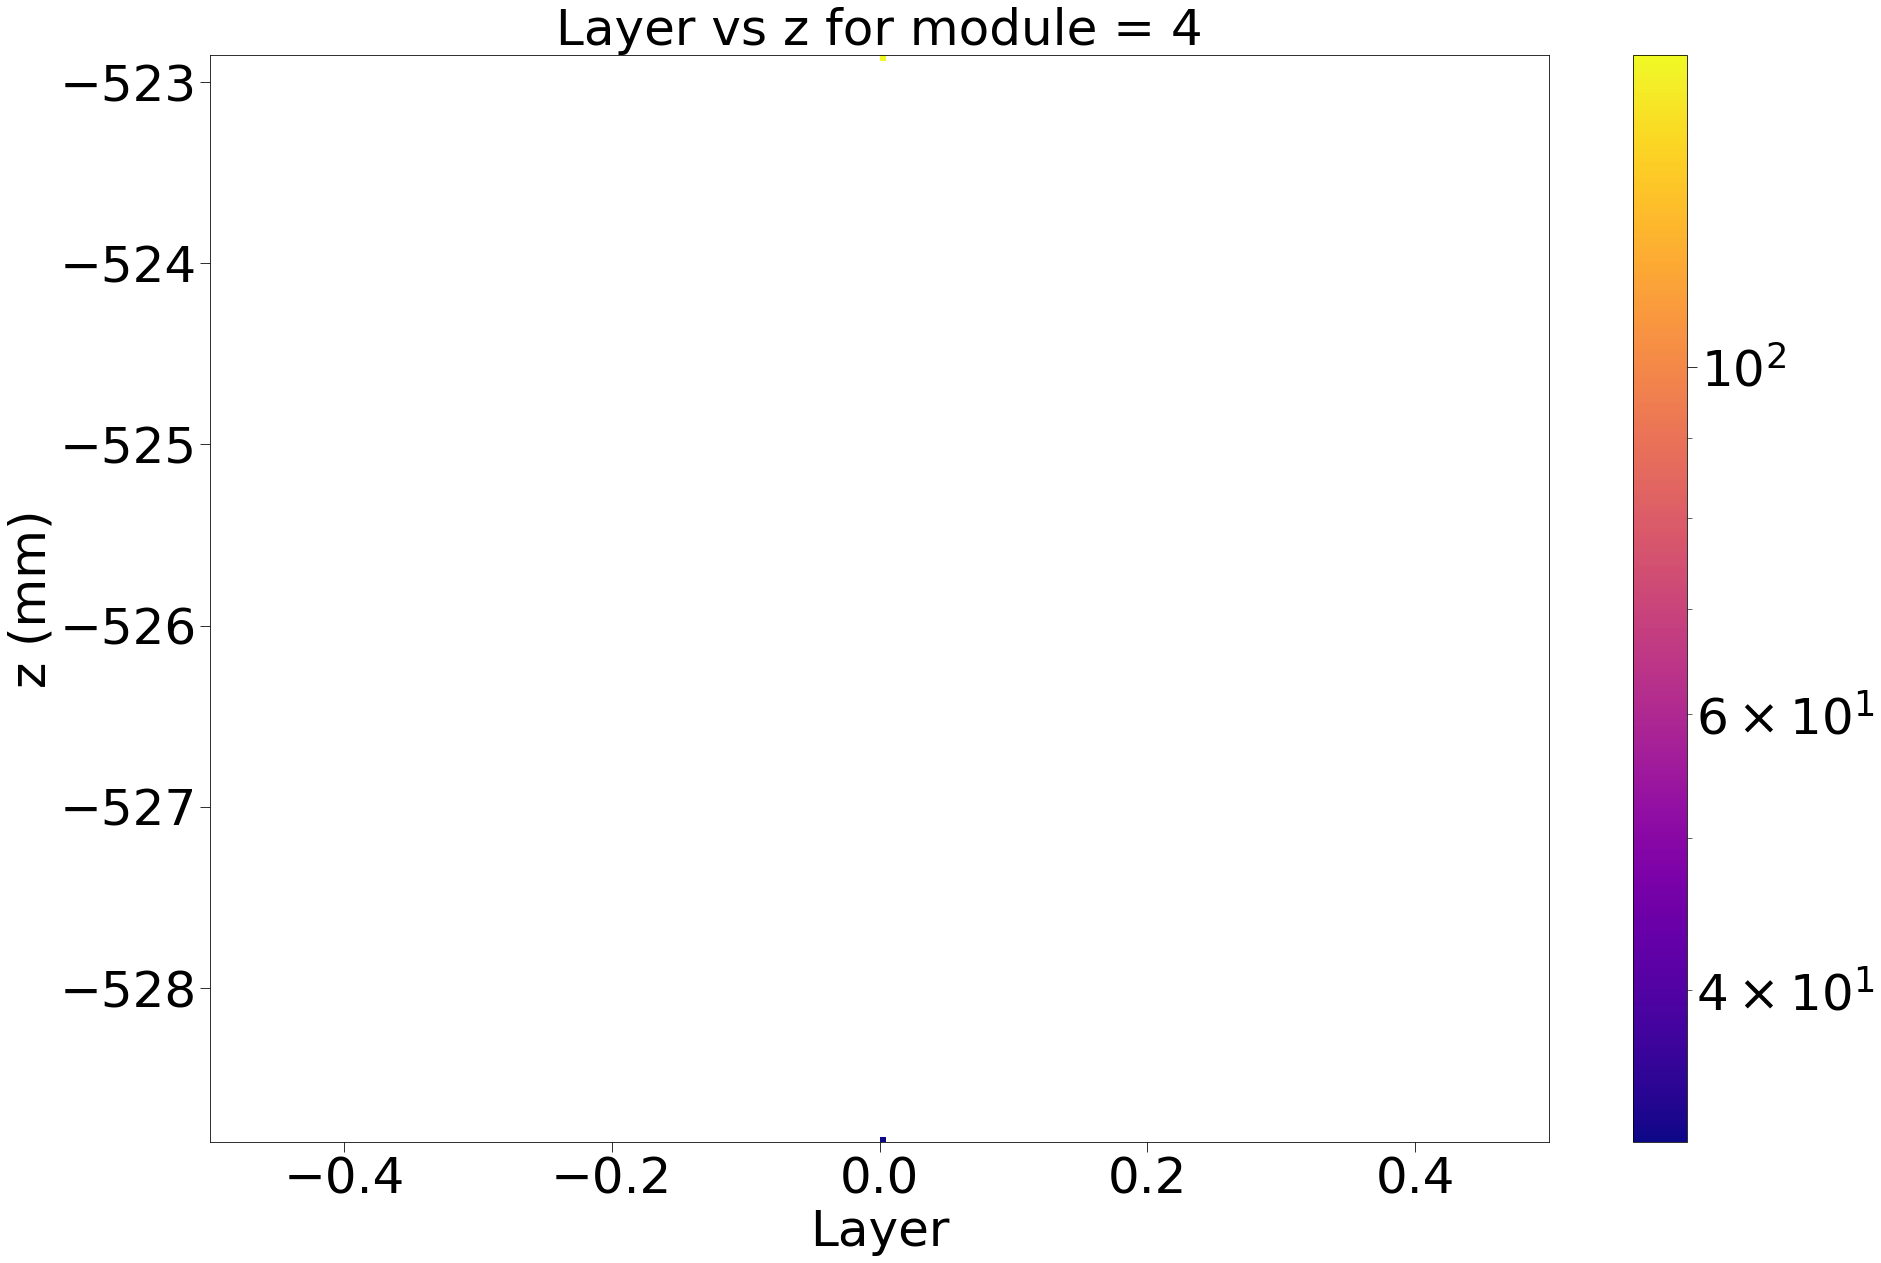

In [16]:
for i in range(1,int(max(secondHitBIB.sys))+1):
    inMod1=(firstHitBIB.sys==(i))
    inMod2=(secondHitBIB.sys==(i))
    plot2DHistogram(np.concatenate((firstHitBIB.lay[inMod1],secondHitBIB.lay[inMod2])), np.concatenate((firstHitBIB.r[inMod1],secondHitBIB.r[inMod2])), bins=200, label=("Layer vs radius for module = "+str(i)+";Layer;Radius (mm)"))
    plot2DHistogram(np.concatenate((firstHitBIB.lay[inMod1],secondHitBIB.lay[inMod2])), np.concatenate((firstHitBIB.z[inMod1],secondHitBIB.z[inMod2])), bins=200, label=("Layer vs z for module = "+str(i)+";Layer;z (mm)"))

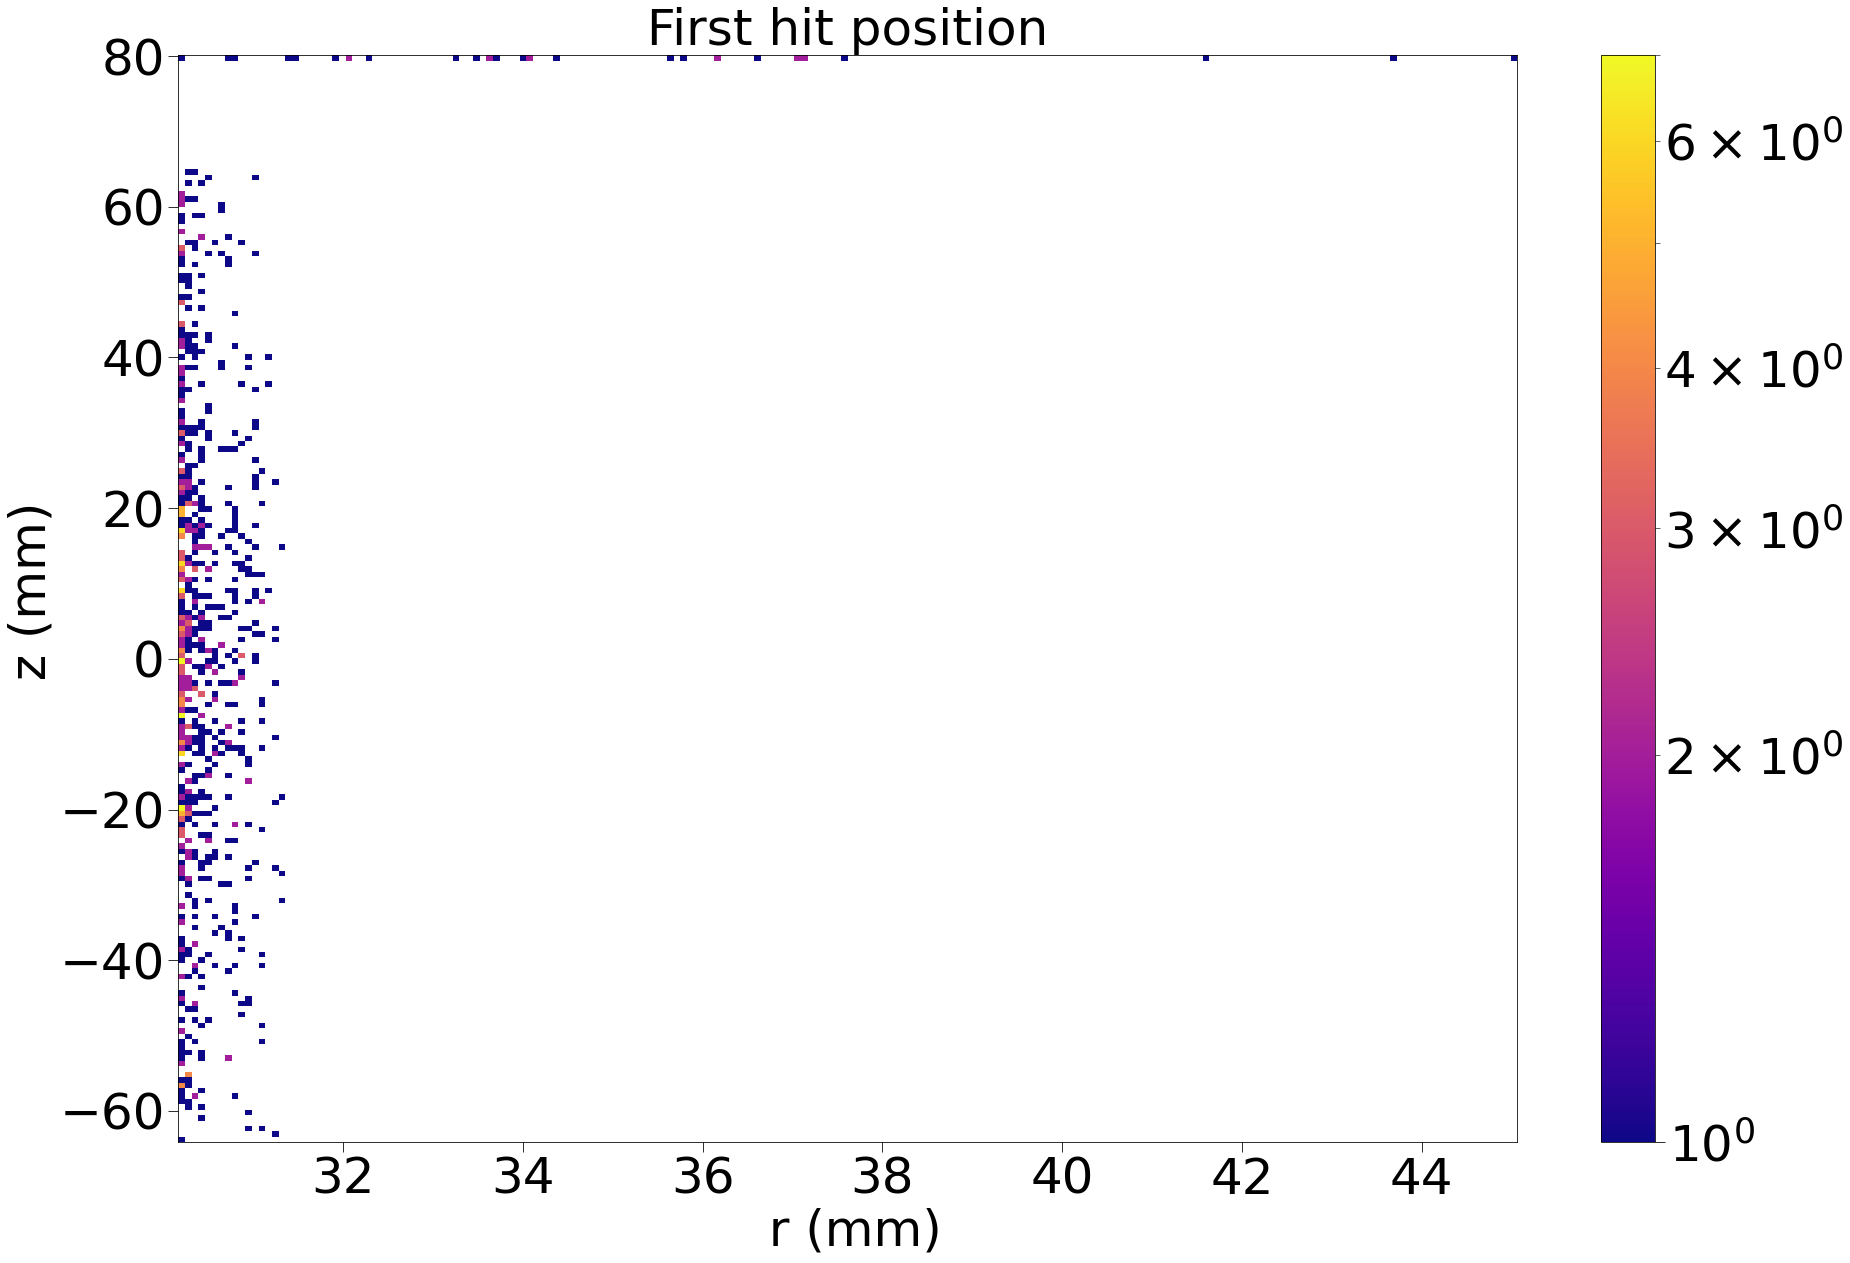

In [17]:
firstLayerMask=((firstHit.sys==1) | (firstHit.sys==2)) & (firstHit.lay==0)
plot2DHistogram(firstHit.r[firstLayerMask],firstHit.z[firstLayerMask], label="First hit position; r (mm); z (mm)", bins=200)

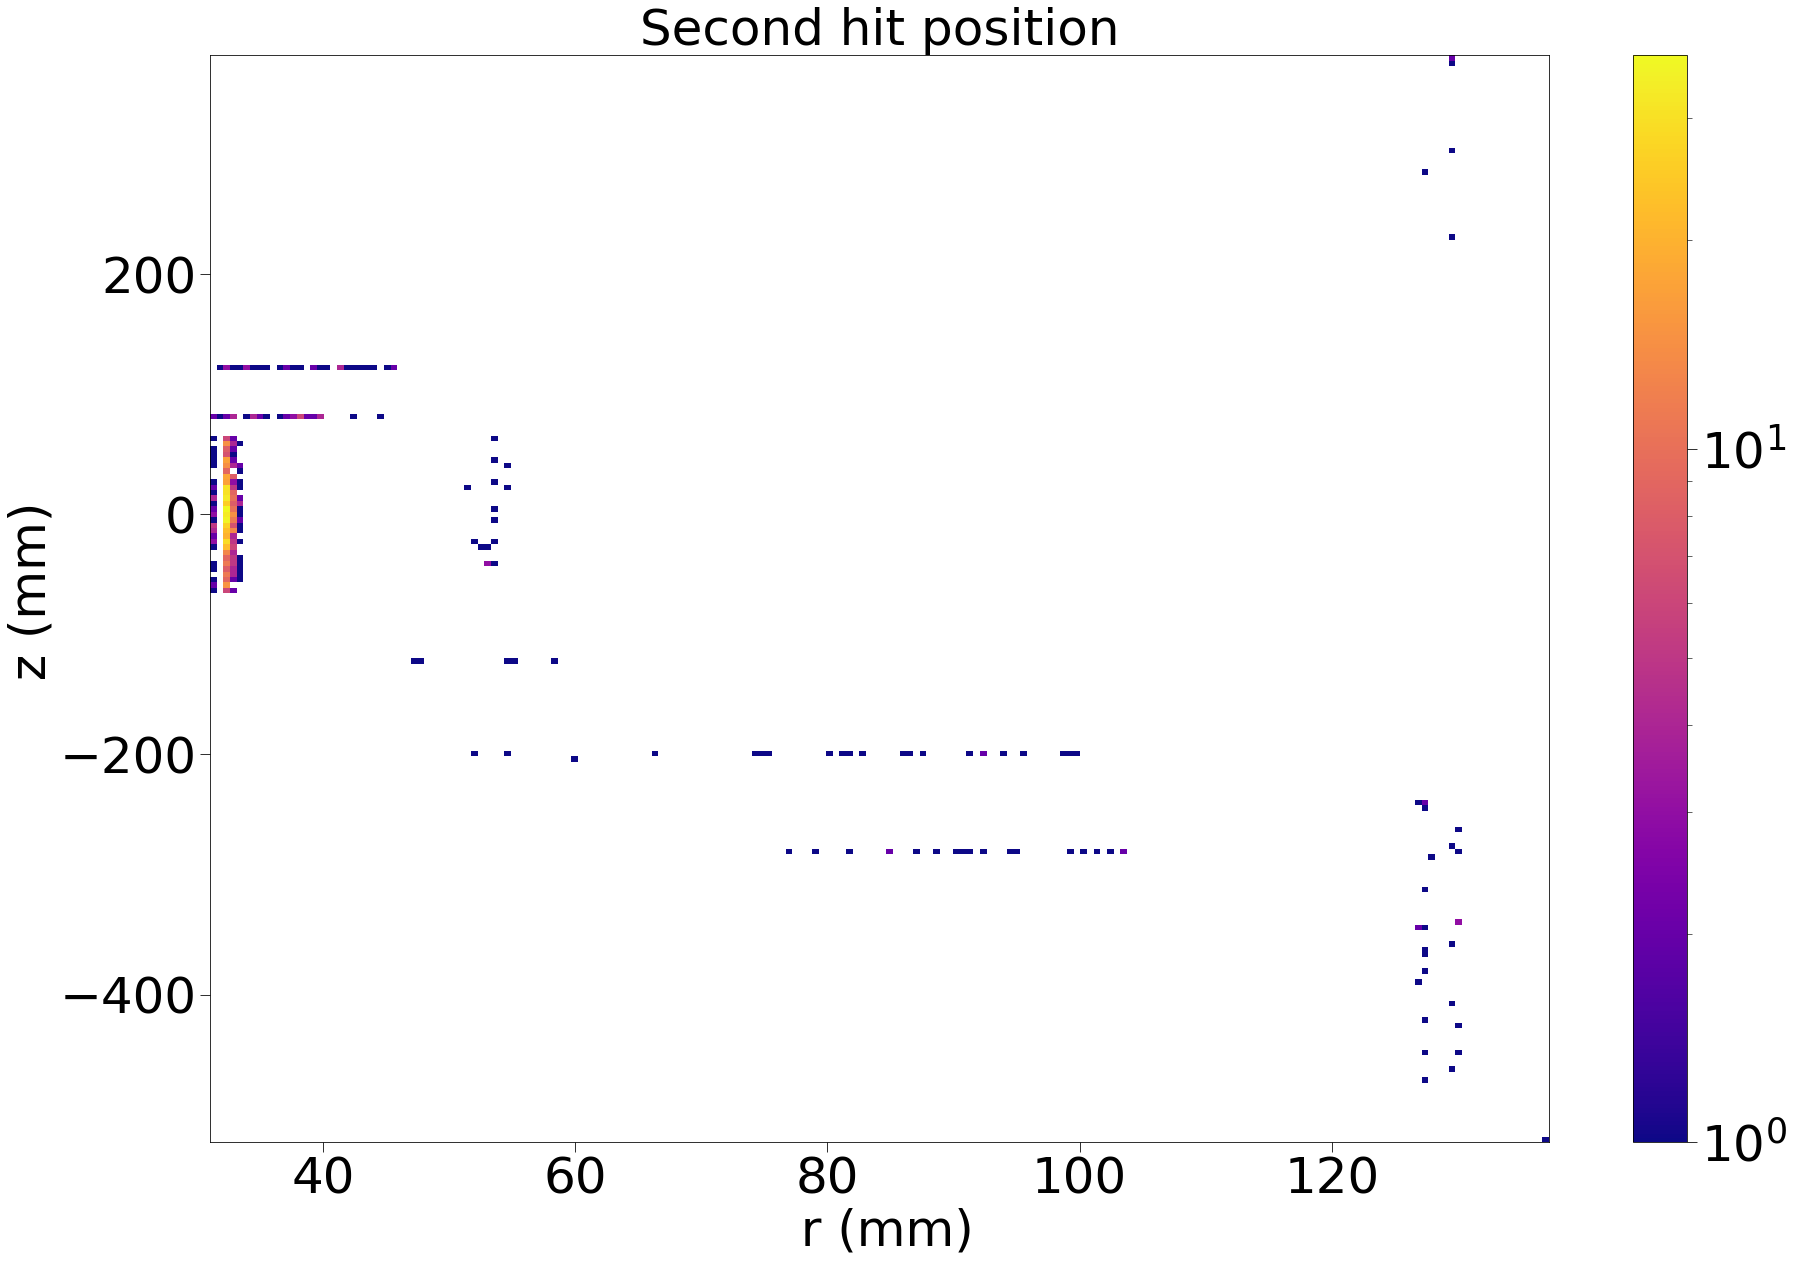

In [18]:
secondLayerMask=((firstHit.sys==1) & (firstHit.lay==1)) | ((firstHit.sys==2) & ((firstHit.lay==2) | (firstHit.lay==3)))
plot2DHistogram(secondHit.r,secondHit.z, label="Second hit position; r (mm); z (mm)", bins=200)

# Split the first hits into first VXB hits and first VXE hits. Then find which tracks have a match on the second layer